1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [3]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
            
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [4]:
print(list(df.columns))


['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [5]:
## Write your code here

# 1. Contar el número de filas duplicadas en el conjunto de datos.
num_filas_duplicadas = df.duplicated().sum()
print(f"1. Número de filas duplicadas en el dataset: {num_filas_duplicadas}")

# 2. Mostrar las primeras filas duplicadas para comprender su estructura.
filas_duplicadas = df[df.duplicated(keep='first')]
print("\n2. Primeras filas duplicadas:")
print(filas_duplicadas.head())


1. Número de filas duplicadas en el dataset: 20

2. Primeras filas duplicadas:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [6]:
num_filas = len(df)
print(f"El número total de filas en el DataFrame es: {num_filas}")

El número total de filas en el DataFrame es: 65457


In [7]:
## Write your code here

# Subconjunto de columnas seleccionado para identificar duplicados
subset_clave = [
    'Country',
    'MainBranch',
    'Employment',
    'RemoteWork',
    'YearsCodePro',
    'EdLevel',
    'OrgSize',
    'DevType'
]

# 1. Identificar duplicados según ese subset
duplicados_custom = df[df.duplicated(subset=subset_clave, keep=False)]

print("Número de duplicados según el subset seleccionado:", duplicados_custom.shape[0])
print("Primeras filas duplicadas según el subset:")
print(duplicados_custom[subset_clave].head())

# 2. Analizar qué columnas suelen tener valores idénticos en duplicados
# Agrupamos por las columnas del subset y revisamos cuántas otras columnas tienen valores constantes dentro del grupo
if not duplicados_custom.empty:
    agrupado = duplicados_custom.groupby(subset_clave).agg(lambda x: x.nunique() == 1)
    columnas_constantes = agrupado.sum().sort_values(ascending=False)

    print("\nColumnas que suelen tener el mismo valor entre duplicados:")
    print(columnas_constantes[columnas_constantes > 0])


Número de duplicados según el subset seleccionado: 17395
Primeras filas duplicadas según el subset:
                                             Country  \
0                           United States of America   
1  United Kingdom of Great Britain and Northern I...   
2  United Kingdom of Great Britain and Northern I...   
3                                             Canada   
4                                             Norway   

                       MainBranch           Employment RemoteWork  \
0  I am a developer by profession  Employed, full-time     Remote   
1  I am a developer by profession  Employed, full-time     Remote   
2  I am a developer by profession  Employed, full-time     Remote   
3           I am learning to code   Student, full-time        NaN   
4  I am a developer by profession   Student, full-time        NaN   

  YearsCodePro                                            EdLevel OrgSize  \
0          NaN                          Primary/elementary school     N

##### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [8]:
import seaborn as sns

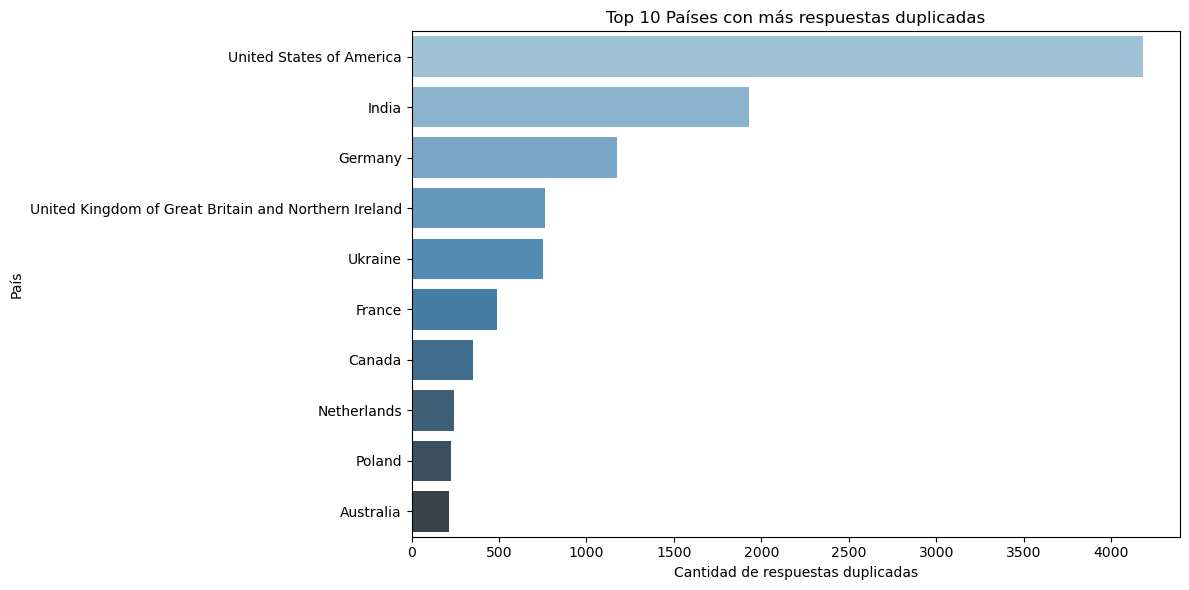

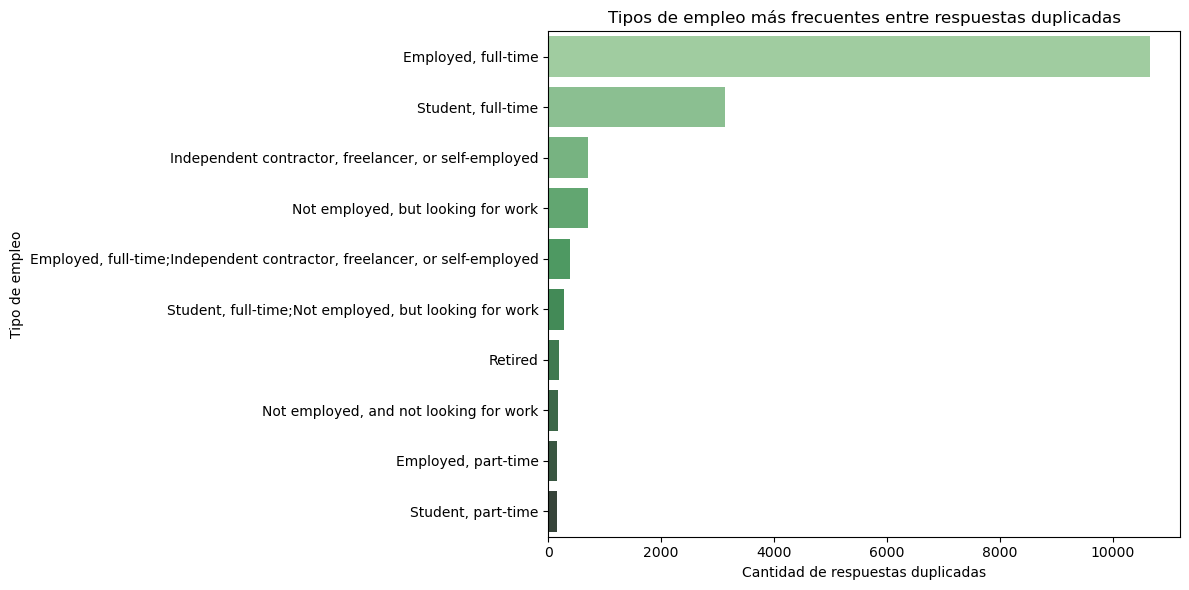

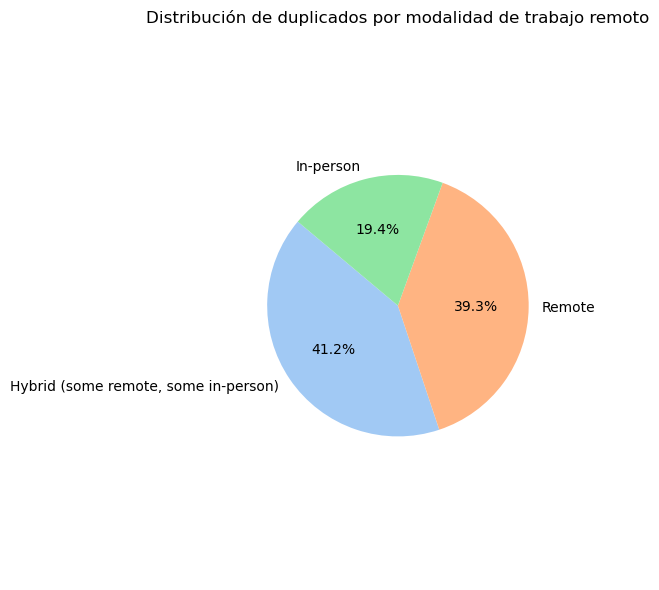

In [9]:
## Write your code here
# 2. Gráfico de barras - Duplicados por País
# ======================
plt.figure(figsize=(12,6))
pais_duplicado = duplicados_custom['Country'].value_counts().head(10)
sns.barplot(x=pais_duplicado.values, y=pais_duplicado.index, palette="Blues_d")
plt.title('Top 10 Países con más respuestas duplicadas')
plt.xlabel('Cantidad de respuestas duplicadas')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# ======================
# 3. Gráfico de barras - Duplicados por Tipo de Empleo
# ======================
plt.figure(figsize=(12,6))
empleo_duplicado = duplicados_custom['Employment'].value_counts().head(10)
sns.barplot(x=empleo_duplicado.values, y=empleo_duplicado.index, palette="Greens_d")
plt.title('Tipos de empleo más frecuentes entre respuestas duplicadas')
plt.xlabel('Cantidad de respuestas duplicadas')
plt.ylabel('Tipo de empleo')
plt.tight_layout()
plt.show()

# ======================
# 4. Gráfico circular - Distribución por Trabajo Remoto
# ======================
trabajo_remoto = duplicados_custom['RemoteWork'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(trabajo_remoto, labels=trabajo_remoto.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de duplicados por modalidad de trabajo remoto')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [10]:
## Write your code here

# 1. Verificar cantidad de duplicados antes de eliminar
# ======================
duplicados_total = df.duplicated(subset=subset_clave, keep='first').sum()
print(f"Total de duplicados a eliminar según subset clave: {duplicados_total}")

# ======================
# 2. Eliminar duplicados estratégicamente
# ======================
df_limpio = df.drop_duplicates(subset=subset_clave, keep='first')

# ======================
# 3. Verificar que se eliminaron correctamente
# ======================
print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de eliminar duplicados: {df_limpio.shape[0]}")
print(f"Filas eliminadas: {df.shape[0] - df_limpio.shape[0]}")


Total de duplicados a eliminar según subset clave: 13039
Filas originales: 65457
Filas después de eliminar duplicados: 52418
Filas eliminadas: 13039


In [11]:
### Task 5: Documentation


In [12]:
### Labs 2 - Removing Duplicates
### Task 6: Documentation Identify Duplicate Rows
#1.	Count the number of duplicate rows in the dataset.
#2.	Display the first few duplicate rows to understand their structure.


In [13]:
# df_limpio es el DataFrame después de eliminar los duplicados en la tarea 4
df = df_limpio  

# Identificar las filas duplicadas exactas (considerando todas las columnas)
duplicados_totales = df.duplicated(keep=False)

# Contar el número total de filas duplicadas
numero_duplicados = duplicados_totales.sum()
print(f"Número total de filas duplicadas en el dataset: {numero_duplicados}")

# Mostrar las primeras filas duplicadas para observar su estructura
primeros_duplicados = df[duplicados_totales].head()
print("\nPrimeras filas duplicadas:")
print(primeros_duplicados)


Número total de filas duplicadas en el dataset: 0

Primeras filas duplicadas:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWi

In [14]:
### Tarea 7: Verificar eliminación de duplicados

In [15]:
# Verificar el número de filas duplicadas en el DataFrame limpio
duplicados_limpio = df_limpio.duplicated().sum()

print(f"Número de filas duplicadas después de eliminar duplicados: {duplicados_limpio}")


Número de filas duplicadas después de eliminar duplicados: 0


In [16]:
### Tarea 8: Gestion de valores faltantes

In [17]:
# 1. Identificar valores faltantes en todas las columnas
valores_faltantes = df.isnull().sum()

# Mostrar la cantidad de valores faltantes por columna
print("Valores faltantes por columna:")
print(valores_faltantes[valores_faltantes > 0])  # Mostrar solo las columnas con valores faltantes


Valores faltantes por columna:
RemoteWork              6682
CodingActivities        6687
EdLevel                  256
LearnCode                469
LearnCodeOnline        10139
                       ...  
JobSatPoints_11        26287
SurveyLength            3874
SurveyEase              3828
ConvertedCompYearly    31169
JobSat                 26573
Length: 109, dtype: int64


In [18]:
# 2.  Seleccionar la columna 'EdLevel' para imputar el valor más frecuente
valor_mas_frecuente = df['EdLevel'].mode()[0]

# Imputar el valor más frecuente en los valores faltantes de la columna 'EdLevel'
df['EdLevel'].fillna(valor_mas_frecuente, inplace=True)

# Verificar que los valores faltantes hayan sido imputados
print(f"Valores faltantes en 'EdLevel' después de la imputación: {df['EdLevel'].isnull().sum()}")


Valores faltantes en 'EdLevel' después de la imputación: 0


In [19]:
### Tarea 9 NORMALIZACION DE DATOS

In [20]:
# 1. Verificar los valores faltantes en la columna 'ConvertedCompYearly'
valores_faltantes_compensacion = df['ConvertedCompYearly'].isnull().sum()
print(f"Número de valores faltantes en ConvertedCompYearly: {valores_faltantes_compensacion}")


Número de valores faltantes en ConvertedCompYearly: 31169


In [21]:
# 2. Imputar valores faltantes con la mediana de 'ConvertedCompYearly'
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)

# Verificar que no queden nulos luego de la imputación
valores_faltantes_compensacion = df['ConvertedCompYearly'].isnull().sum()
print(f"Número de valores faltantes en ConvertedCompYearly: {valores_faltantes_compensacion}")

Número de valores faltantes en ConvertedCompYearly: 0


In [22]:
# 3. Análisis descriptivo de 'ConvertedCompYearly'
print(df['ConvertedCompYearly'].describe())

count    5.241800e+04
mean     7.249598e+04
std      1.228278e+05
min      1.000000e+00
25%      6.444400e+04
50%      6.444400e+04
75%      6.444400e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [23]:
### Labs 3 - Finding Missing Values
### Tarea 10: EXPLORACION DEL DATASET Y BÚSQUEDA DE VALORES FALTANTES

In [24]:
# 1. Información general sobre el DataFrame
df_info = df.info()
print("Información básica sobre el DataFrame:")
print(df_info)

# 2. Estadísticas resumidas para columnas numéricas
df_statistics = df.describe()
print("\nEstadísticas resumidas del conjunto de datos:")
print(df_statistics)


<class 'pandas.core.frame.DataFrame'>
Index: 52418 entries, 0 to 65435
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 46.0+ MB
Información básica sobre el DataFrame:
None

Estadísticas resumidas del conjunto de datos:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  52418.000000   2.985100e+04  26301.000000    26031.000000   
mean   29710.228738  3.349972e+145     11.736702       18.615996   
std    18132.632844  5.787894e+147      9.348328       26.041468   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    13924.250000   5.626550e+04      5.000000        0.000000   
50%    28919.500000   1.050000e+05      9.000000       10.000000   
75%    44823.750000   2.500000e+05     17.000000       23.500000   
max    65436.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    26091.000000    26105.000000    26

In [25]:
# 3. Contar valores faltantes por columna
valores_faltantes = df.isnull().sum()
print("\nValores faltantes por columna:")
print(valores_faltantes)



Valores faltantes por columna:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork              6682
                       ...  
JobSatPoints_11        26287
SurveyLength            3874
SurveyEase              3828
ConvertedCompYearly        0
JobSat                 26573
Length: 114, dtype: int64


In [26]:
### Tarea 11: IDENTIFICAR VALORES FALTANTES EN TODAS LAS COLUMNAS

In [27]:
# Identificar los valores faltantes en todas las columnas
valores_faltantes_por_columna = df.isnull().sum()

# Mostrar los resultados (columnas con valores faltantes)
print("Valores faltantes por columna:")
print(valores_faltantes_por_columna[valores_faltantes_por_columna > 0])

# También se puede mostrar el porcentaje de valores faltantes en cada columna
porcentaje_faltantes = (valores_faltantes_por_columna / df.shape[0]) * 100
print("\nPorcentaje de valores faltantes por columna:")
print(porcentaje_faltantes[porcentaje_faltantes > 0])


Valores faltantes por columna:
RemoteWork           6682
CodingActivities     6687
LearnCode             469
LearnCodeOnline     10139
TechDoc             17030
                    ...  
JobSatPoints_10     26283
JobSatPoints_11     26287
SurveyLength         3874
SurveyEase           3828
JobSat              26573
Length: 107, dtype: int64

Porcentaje de valores faltantes por columna:
RemoteWork          12.747529
CodingActivities    12.757068
LearnCode            0.894731
LearnCodeOnline     19.342592
TechDoc             32.488840
                      ...    
JobSatPoints_10     50.141173
JobSatPoints_11     50.148804
SurveyLength         7.390591
SurveyEase           7.302835
JobSat              50.694418
Length: 107, dtype: float64


In [28]:
### Tarea 12: VISUALIZAR FALTANTES EN HEATMAP

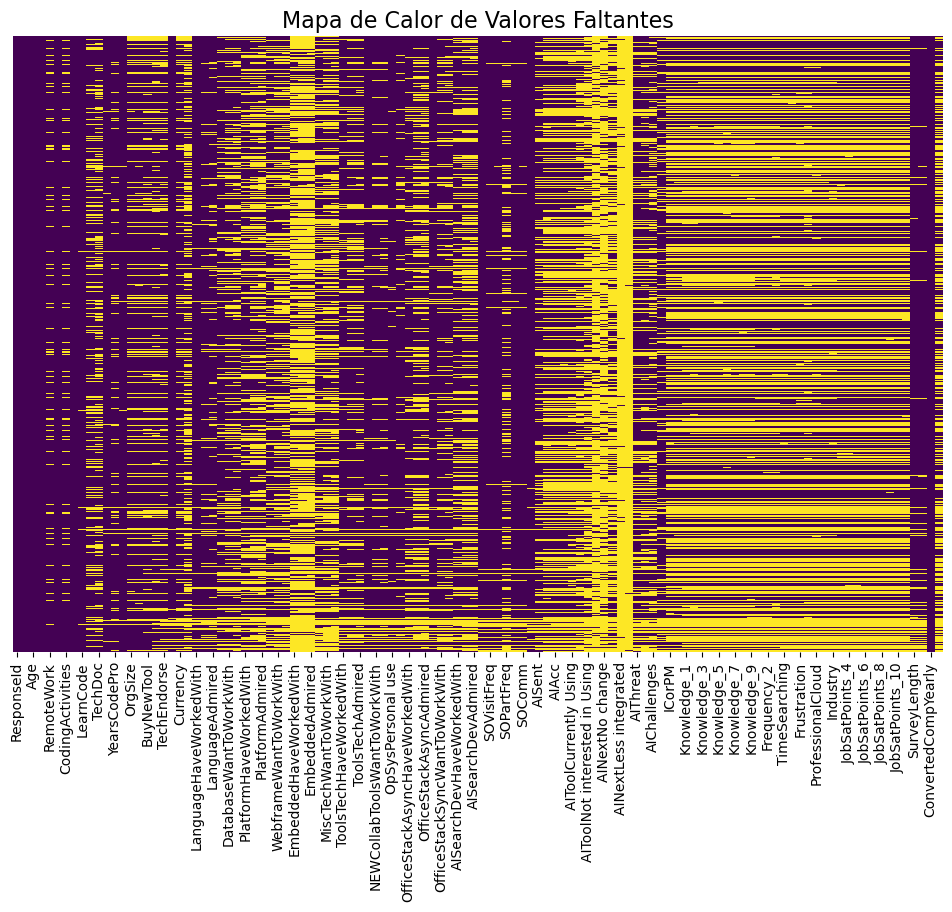

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el mapa de calor para visualizar los valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Título del gráfico
plt.title('Mapa de Calor de Valores Faltantes', fontsize=16)

# Mostrar el gráfico
plt.show()


In [30]:
### Tarea 13: CONTAR FALTANTES EN UNA COLUMNA E IMPUTAR FALTANTES (RemoteWork)

In [31]:
# 1. Contar el número de filas faltantes en la columna 'RemoteWork'
faltantes_remote_work = df['RemoteWork'].isnull().sum()
print(f"Número de valores faltantes en la columna 'RemoteWork': {faltantes_remote_work}")

# 2. Imputar los valores faltantes con el valor más frecuente (moda) de la columna 'RemoteWork'
remote_work_moda = df['RemoteWork'].mode()[0]  # Seleccionamos la moda (valor más frecuente)
df['RemoteWork'].fillna(remote_work_moda, inplace=True)

# 3. Verificar que no haya más valores faltantes en la columna 'RemoteWork'
faltantes_remote_work_post_imputacion = df['RemoteWork'].isnull().sum()
print(f"Número de valores faltantes en la columna 'RemoteWork' después de la imputación: {faltantes_remote_work_post_imputacion}")


Número de valores faltantes en la columna 'RemoteWork': 6682
Número de valores faltantes en la columna 'RemoteWork' después de la imputación: 0


In [32]:
### Tarea 14: IDENTIFICAR VALOR MÁS FRECUENTE EN UNA COLUMNA

In [33]:
# 1. Identificar el valor más frecuente en la columna 'RemoteWork'
valor_mayoritario_remote_work = df['RemoteWork'].mode()[0]
print(f"El valor más frecuente (mayoritario) en la columna 'RemoteWork' es: {valor_mayoritario_remote_work}")

# Si quieres probar con otra columna, simplemente reemplaza 'RemoteWork' por el nombre de otra columna, por ejemplo:
valor_mayoritario_employment = df['Employment'].mode()[0]
print(f"El valor más frecuente en la columna 'Employment' es: {valor_mayoritario_employment}")


El valor más frecuente (mayoritario) en la columna 'RemoteWork' es: Hybrid (some remote, some in-person)
El valor más frecuente en la columna 'Employment' es: Employed, full-time


In [34]:
### Tarea 15: IMPUTAR CON LOS FRECUENTES LOS VALORES FALTANTES EN EMPLOYMENT

In [35]:
# 1. Obtener el valor más frecuente en la columna 'Employment'
valor_mayoritario_employment = df['Employment'].mode()[0]
print(f"El valor más frecuente en la columna 'Employment' es: {valor_mayoritario_employment}")

# 2. Imputar los valores faltantes en la columna 'Employment' con el valor más frecuente
df['Employment'].fillna(valor_mayoritario_employment, inplace=True)

# Verificar que los valores faltantes han sido imputados
valores_faltantes_employment = df['Employment'].isnull().sum()
print(f"Número de valores faltantes en 'Employment' después de la imputación: {valores_faltantes_employment}")


El valor más frecuente en la columna 'Employment' es: Employed, full-time
Número de valores faltantes en 'Employment' después de la imputación: 0


In [36]:
### Tarea 16: VISUALIZACIÓN DESPUES DE LA IMPUTACION

C:\Users\valki\AppData\Local\Temp\ipykernel_70940\1236557193.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta el espaciado de las etiquetas para evitar que se sobrepongan


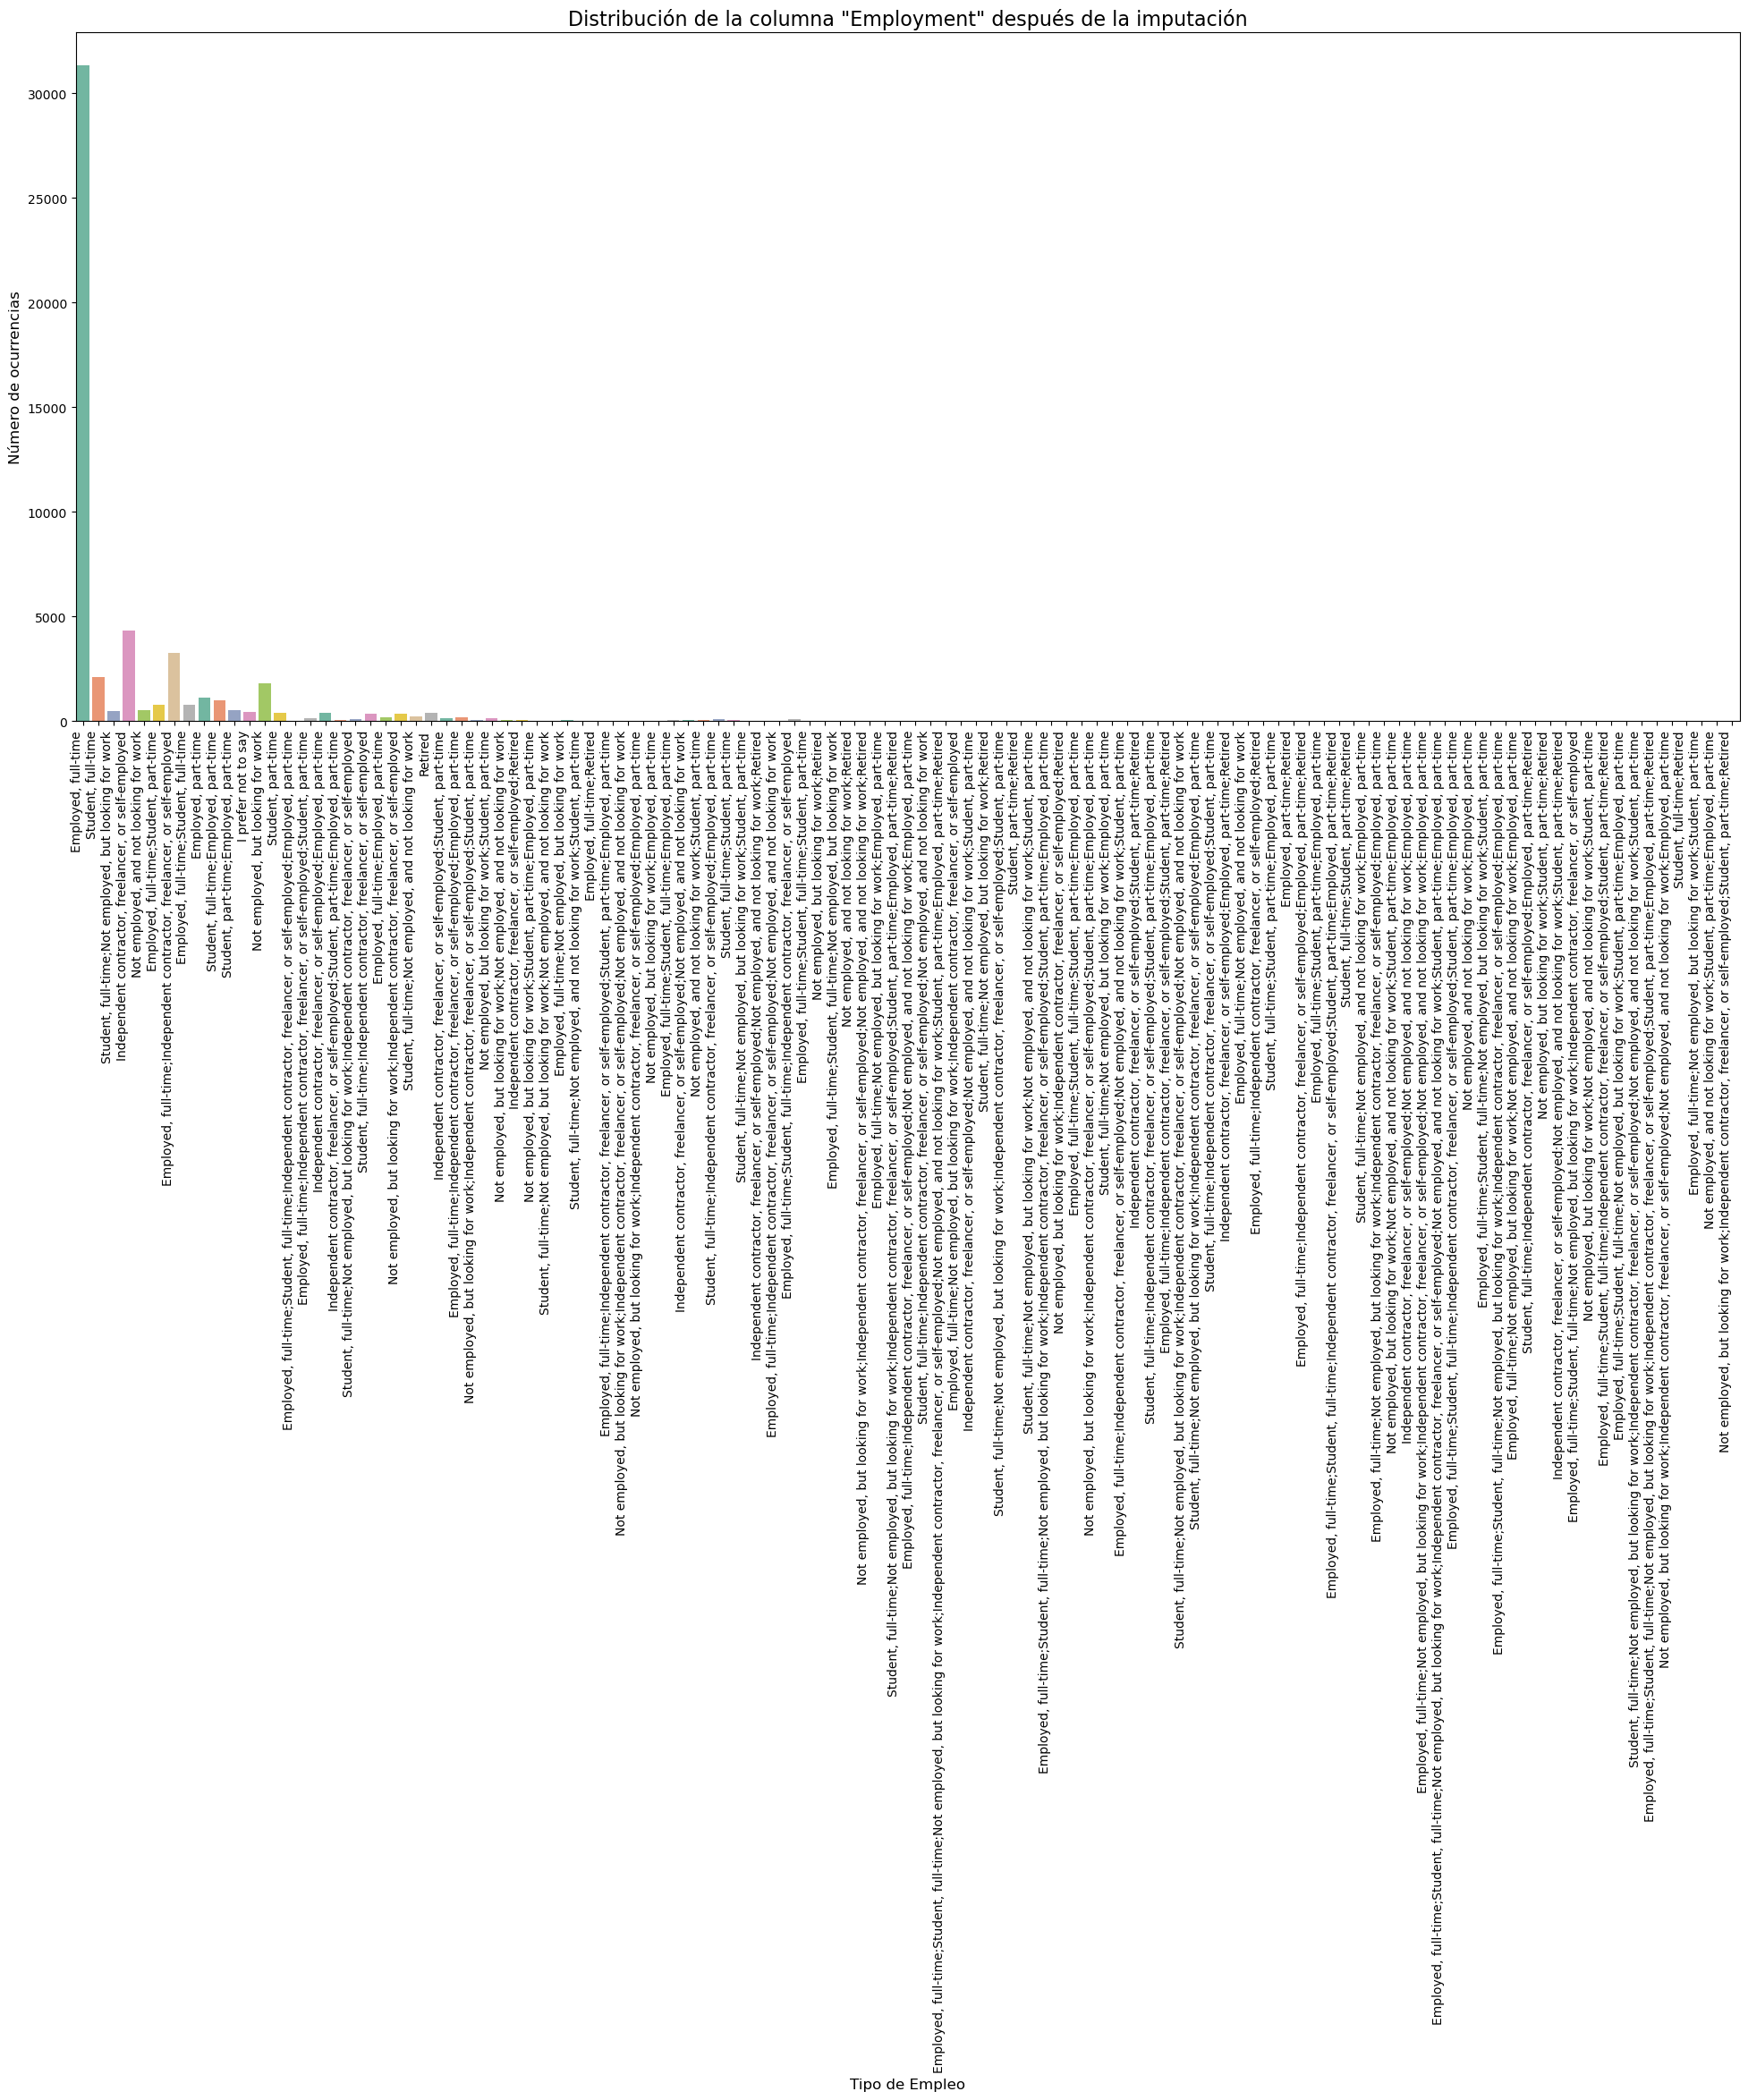

In [37]:
# Visualizar la distribución de la columna 'Employment' después de la imputación
plt.figure(figsize=(24, 10))
sns.countplot(data=df, x='Employment', palette='Set2')

# Título y etiquetas
plt.title('Distribución de la columna "Employment" después de la imputación', fontsize=16)
plt.xlabel('Tipo de Empleo', fontsize=12)
plt.ylabel('Número de ocurrencias', fontsize=12)

# Mejorar la legibilidad de las etiquetas del eje X
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas y ajustar el tamaño de la fuente
plt.tight_layout()  # Ajusta el espaciado de las etiquetas para evitar que se sobrepongan

# Mostrar el gráfico
plt.show()

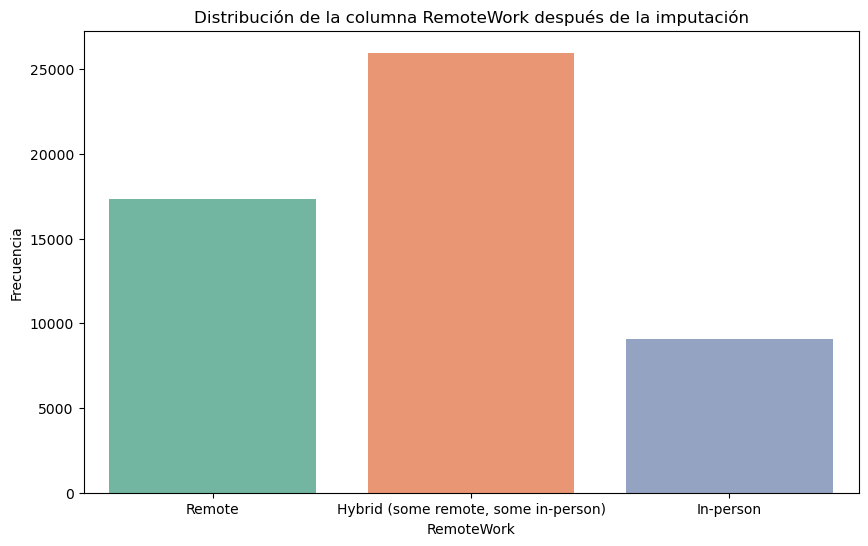

In [38]:
# Visualizar la distribución de la columna 'RemoteWork' después de la imputación
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', palette='Set2')
plt.title('Distribución de la columna RemoteWork después de la imputación')
plt.xlabel('RemoteWork')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=0)
plt.show()

In [39]:
### Labs 4 - Impute Missing Values
### Tareas 17 a 23 están realizadas en las tareas 4 a 16

In [40]:
### Tarea 24: Verificar si hay columnas relacionadas con la compensación y describir su distribución.

Columnas relacionadas con la compensación: ['EdLevel', 'CompTotal', 'AIComplex', 'WorkExp', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat']

Estadísticas descriptivas de las columnas relacionadas con la compensación:
           CompTotal       WorkExp  JobSatPoints_1  JobSatPoints_4  \
count   2.985100e+04  26301.000000    26031.000000    26091.000000   
mean   3.349972e+145     11.736702       18.615996        7.726984   
std    5.787894e+147      9.348328       26.041468       18.676223   
min     0.000000e+00      0.000000        0.000000        0.000000   
25%     5.626550e+04      5.000000        0.000000        0.000000   
50%     1.050000e+05      9.000000       10.000000        0.000000   
75%     2.500000e+05     17.000000       23.500000        5.000000   
max    1.000000e+150     50.000000      100.000000      100.000000   

   

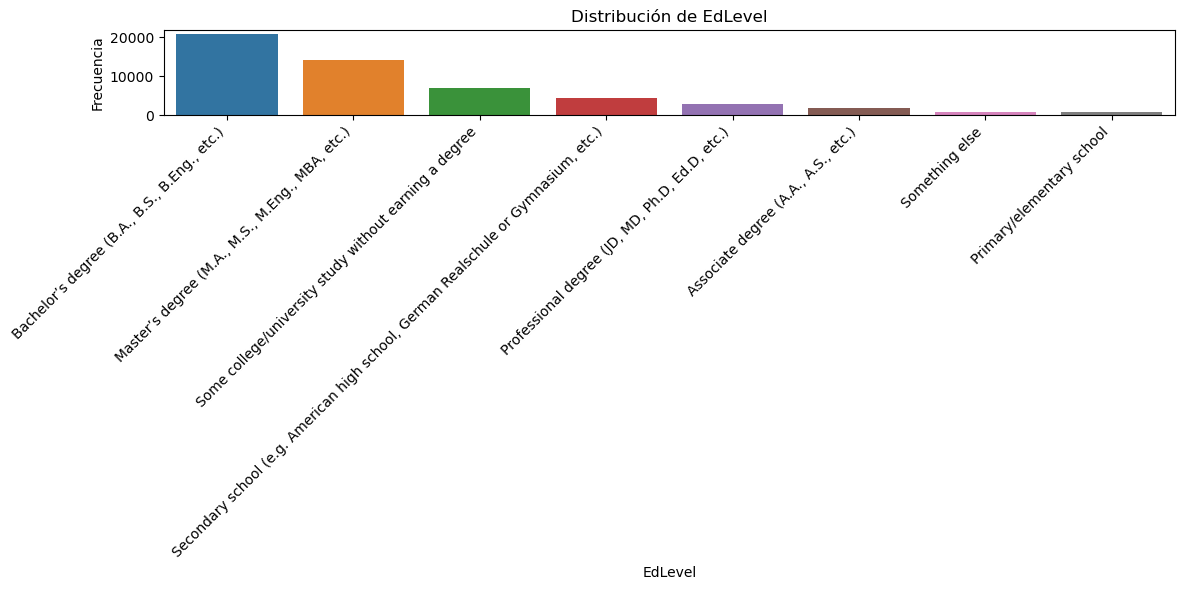


Distribución de la columna CompTotal:
count     2.985100e+04
mean     3.349972e+145
std      5.787894e+147
min       0.000000e+00
25%       5.626550e+04
50%       1.050000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


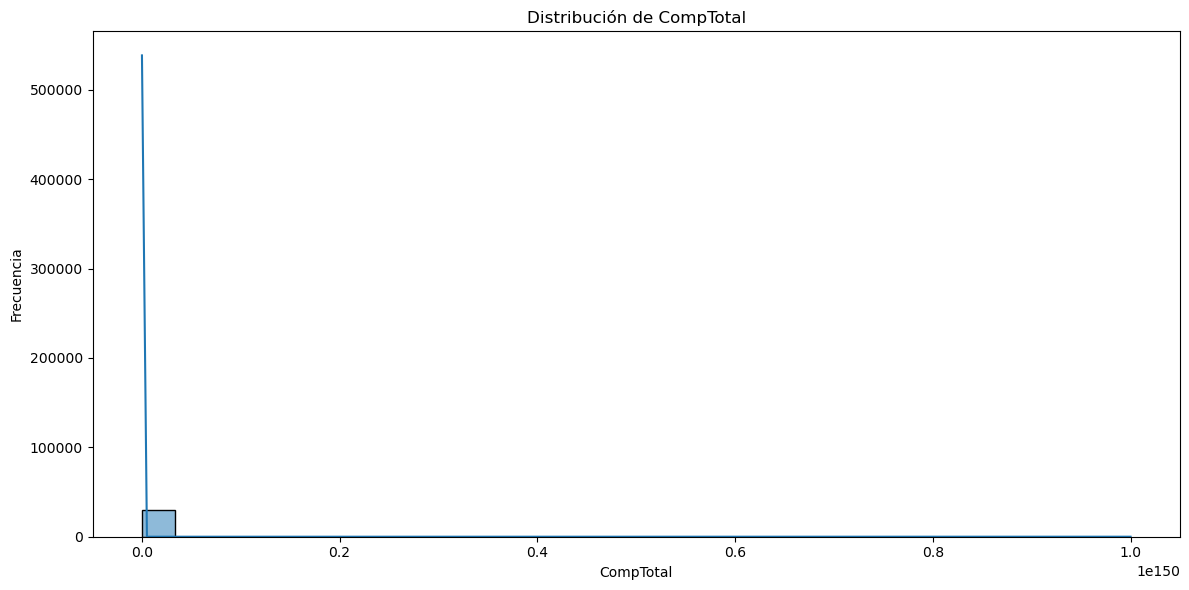


Distribución de la columna AIComplex:
count                                             30726
unique                                                5
top       Good, but not great at handling complex tasks
freq                                               9948
Name: AIComplex, dtype: object


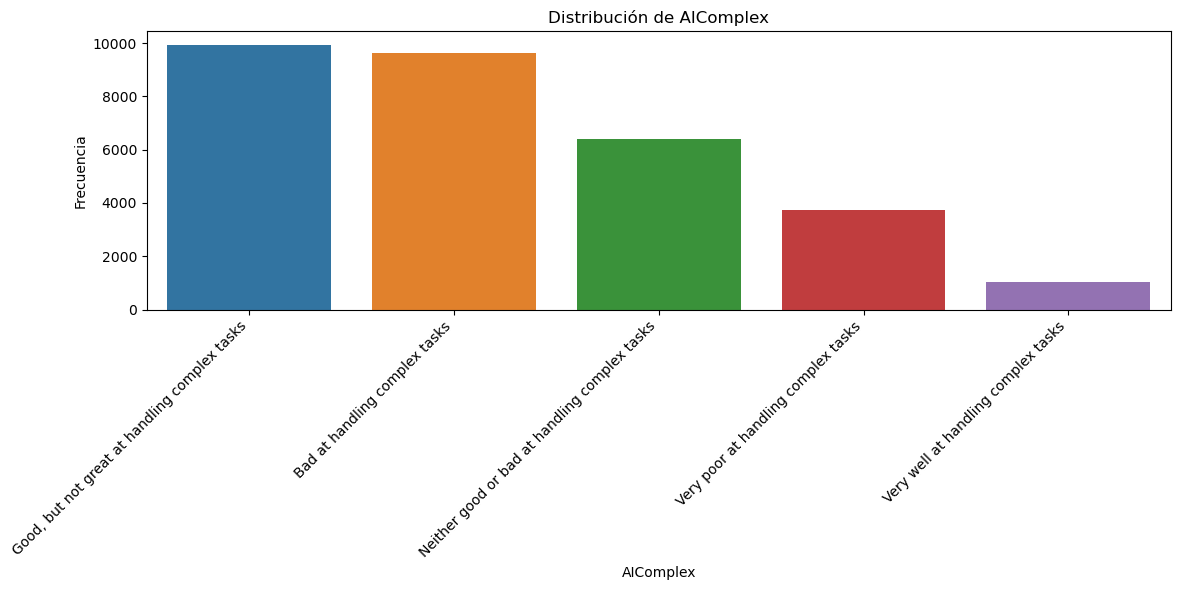


Distribución de la columna WorkExp:
count    26301.000000
mean        11.736702
std          9.348328
min          0.000000
25%          5.000000
50%          9.000000
75%         17.000000
max         50.000000
Name: WorkExp, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


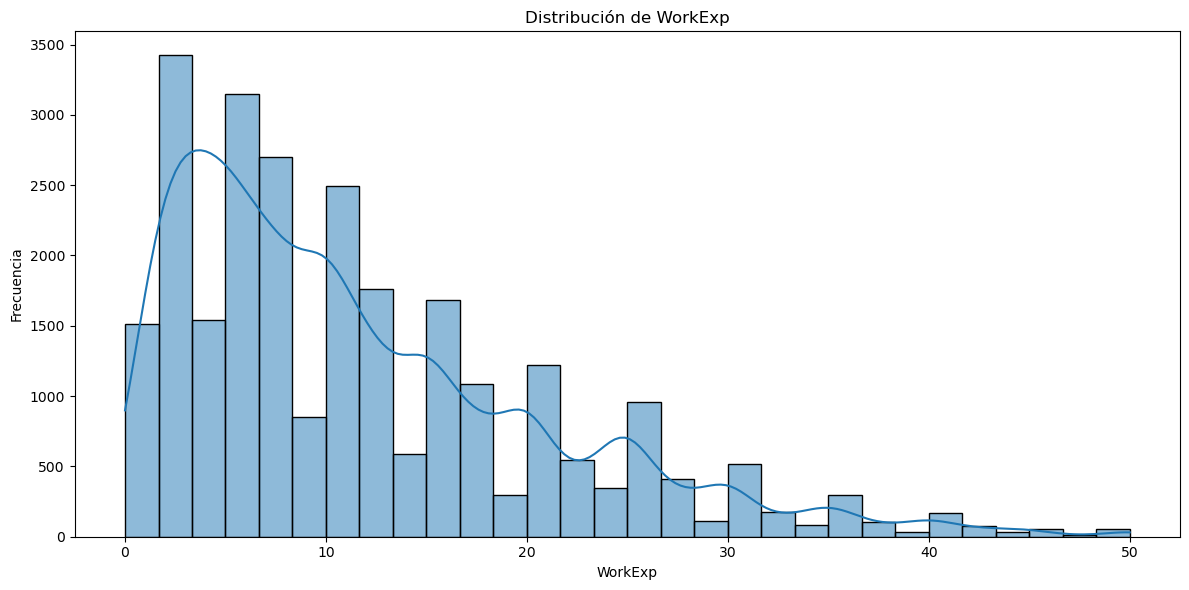


Distribución de la columna JobSatPoints_1:
count    26031.000000
mean        18.615996
std         26.041468
min          0.000000
25%          0.000000
50%         10.000000
75%         23.500000
max        100.000000
Name: JobSatPoints_1, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


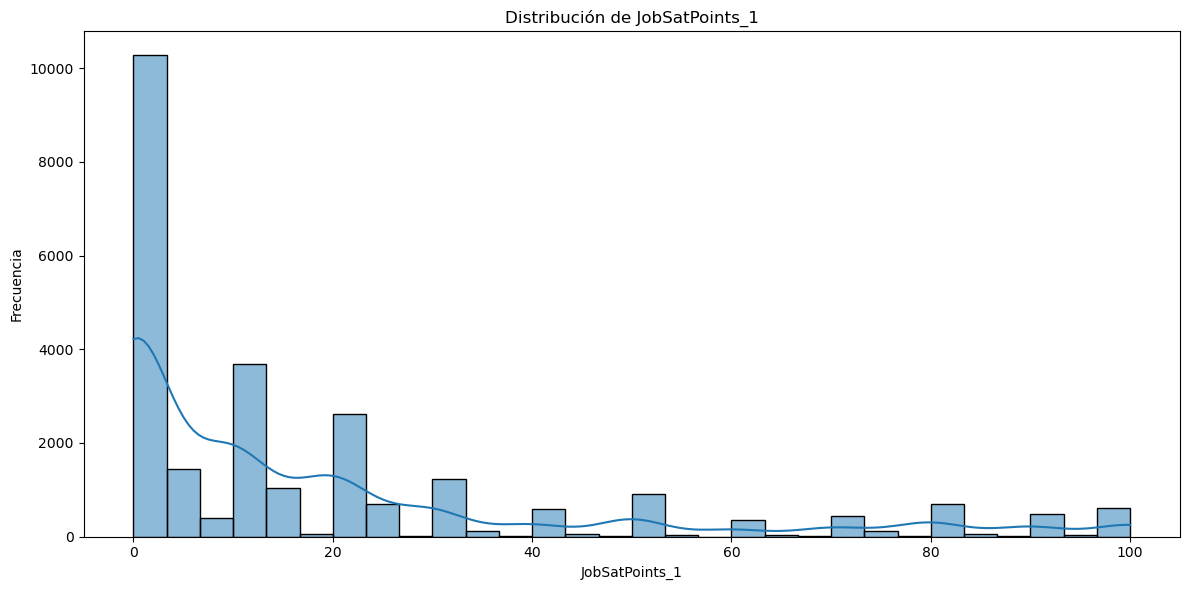


Distribución de la columna JobSatPoints_4:
count    26091.000000
mean         7.726984
std         18.676223
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        100.000000
Name: JobSatPoints_4, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


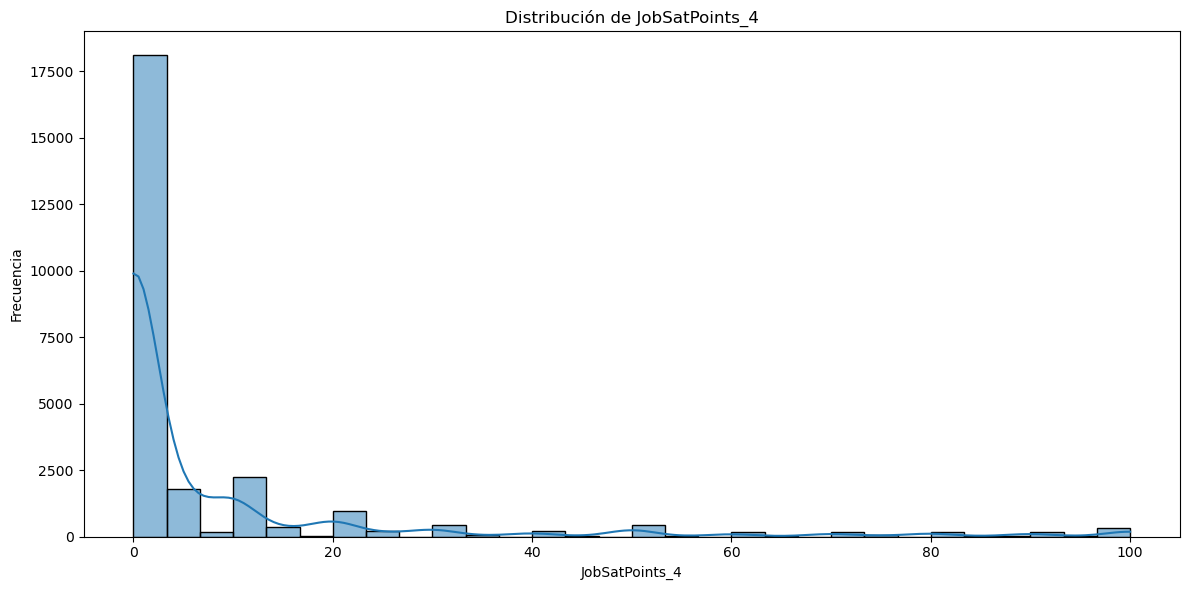


Distribución de la columna JobSatPoints_5:
count    26105.000000
mean        10.082240
std         21.808587
min          0.000000
25%          0.000000
50%          0.000000
75%         10.000000
max        100.000000
Name: JobSatPoints_5, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


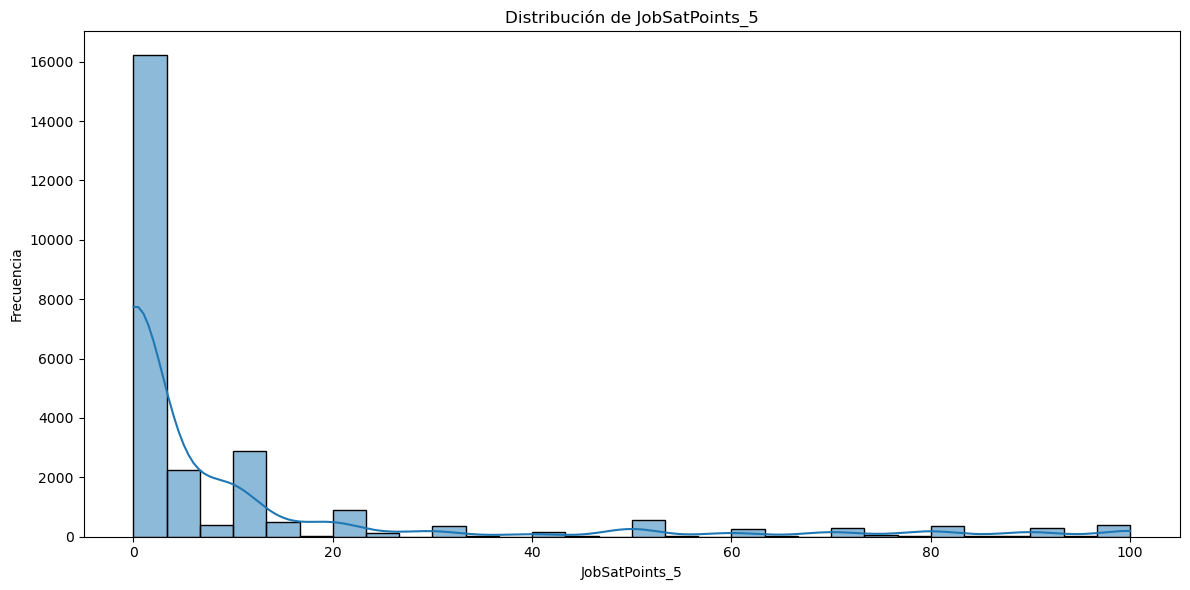


Distribución de la columna JobSatPoints_6:
count    26142.000000
mean        24.234419
std         27.105321
min          0.000000
25%          0.000000
50%         20.000000
75%         30.000000
max        100.000000
Name: JobSatPoints_6, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


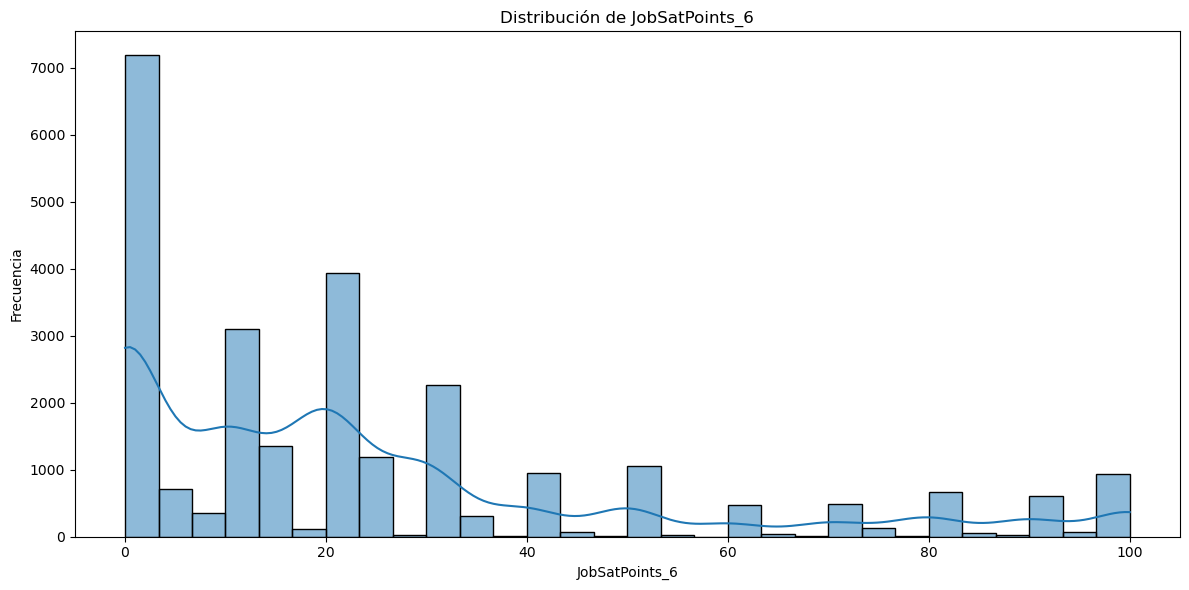


Distribución de la columna JobSatPoints_7:
count    26134.000000
mean        22.933011
std         27.027686
min          0.000000
25%          0.000000
50%         15.000000
75%         30.000000
max        100.000000
Name: JobSatPoints_7, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


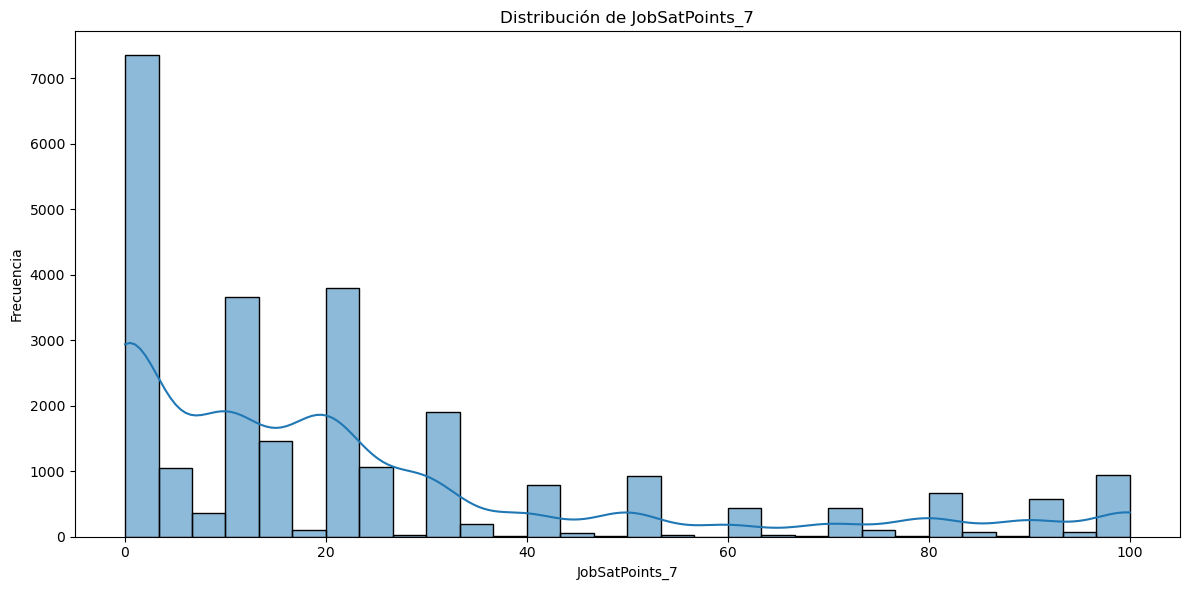


Distribución de la columna JobSatPoints_8:
count    26143.000000
mean        20.273137
std         26.158483
min          0.000000
25%          0.000000
50%         10.000000
75%         25.000000
max        100.000000
Name: JobSatPoints_8, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


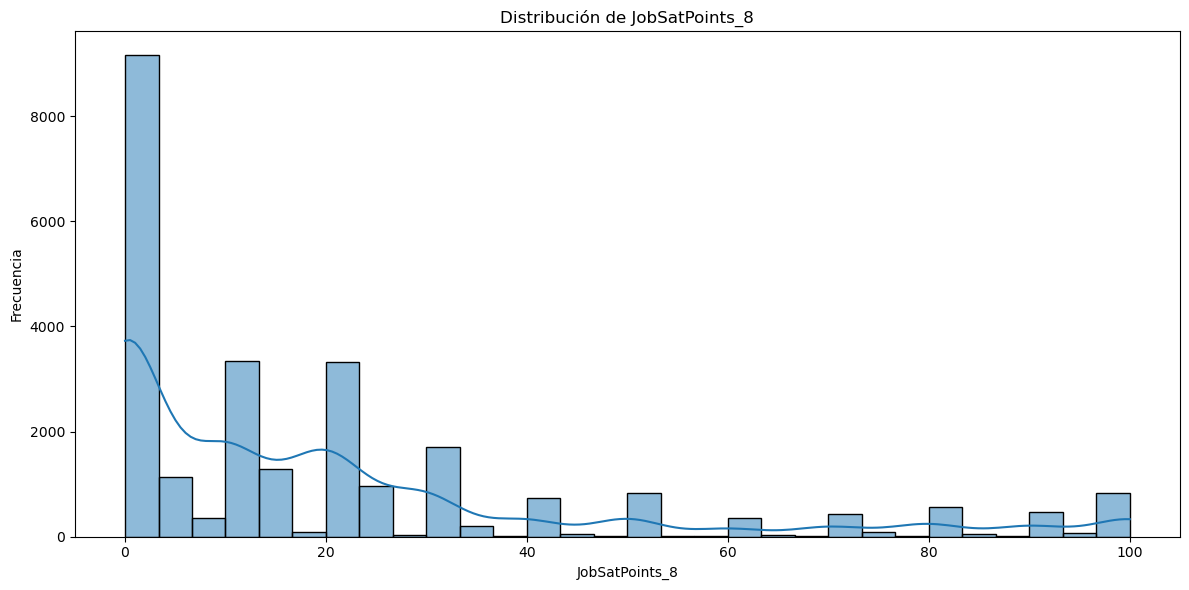


Distribución de la columna JobSatPoints_9:
count    26142.000000
mean        16.183490
std         24.918929
min          0.000000
25%          0.000000
50%          5.000000
75%         20.000000
max        100.000000
Name: JobSatPoints_9, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


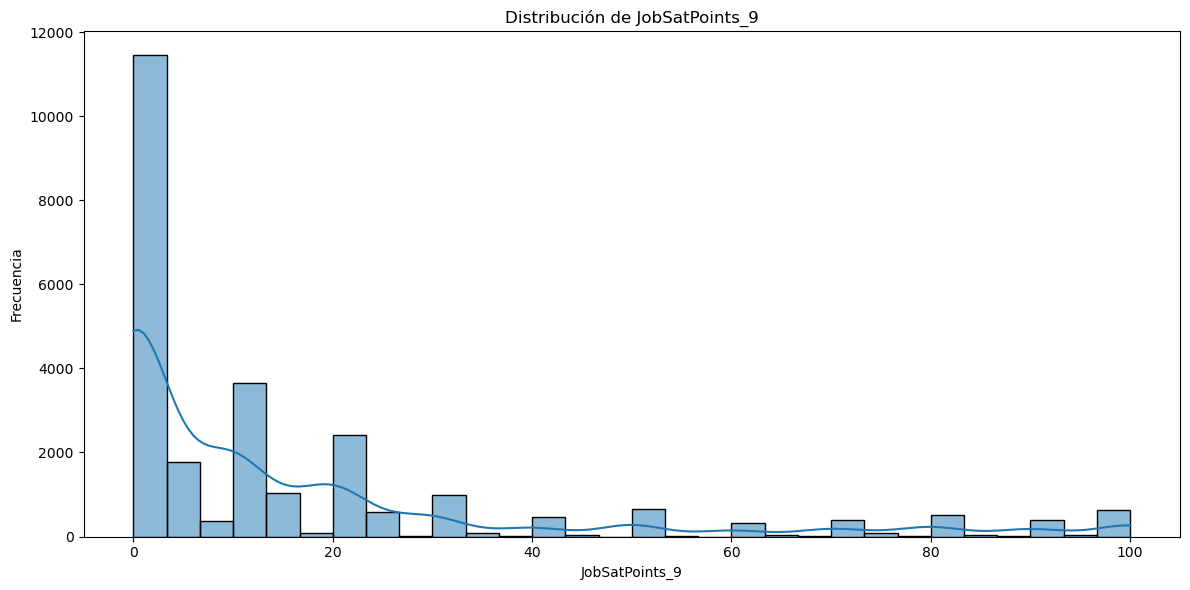


Distribución de la columna JobSatPoints_10:
count    26135.000000
mean        11.018969
std         22.936994
min          0.000000
25%          0.000000
50%          0.000000
75%         10.000000
max        100.000000
Name: JobSatPoints_10, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


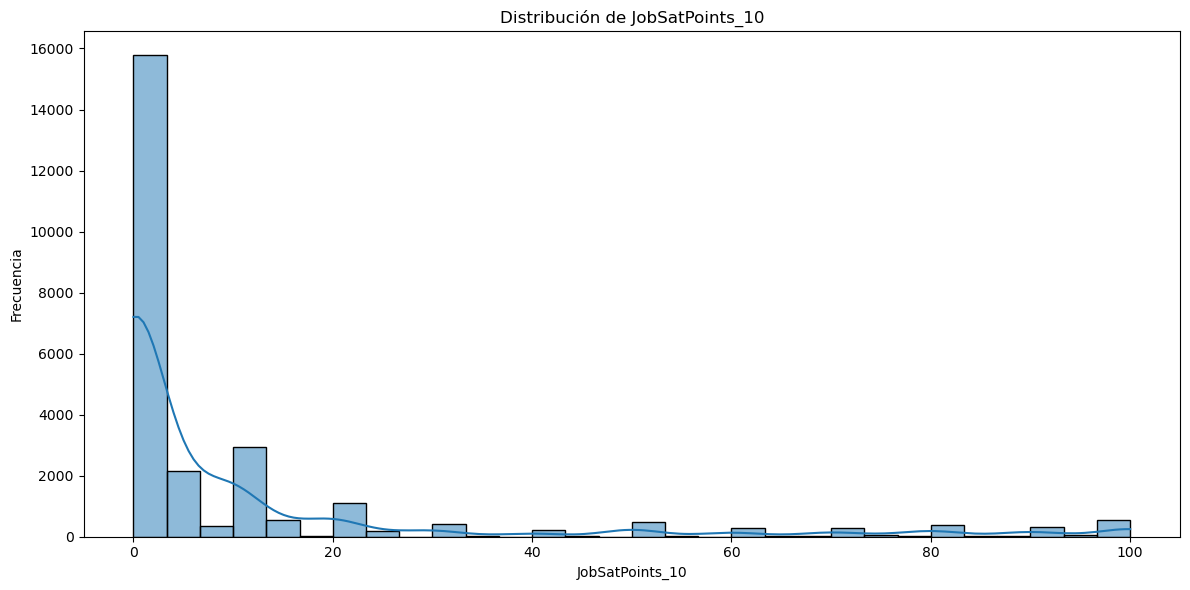


Distribución de la columna JobSatPoints_11:
count    26131.000000
mean         9.919884
std         21.742264
min          0.000000
25%          0.000000
50%          0.000000
75%         10.000000
max        100.000000
Name: JobSatPoints_11, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


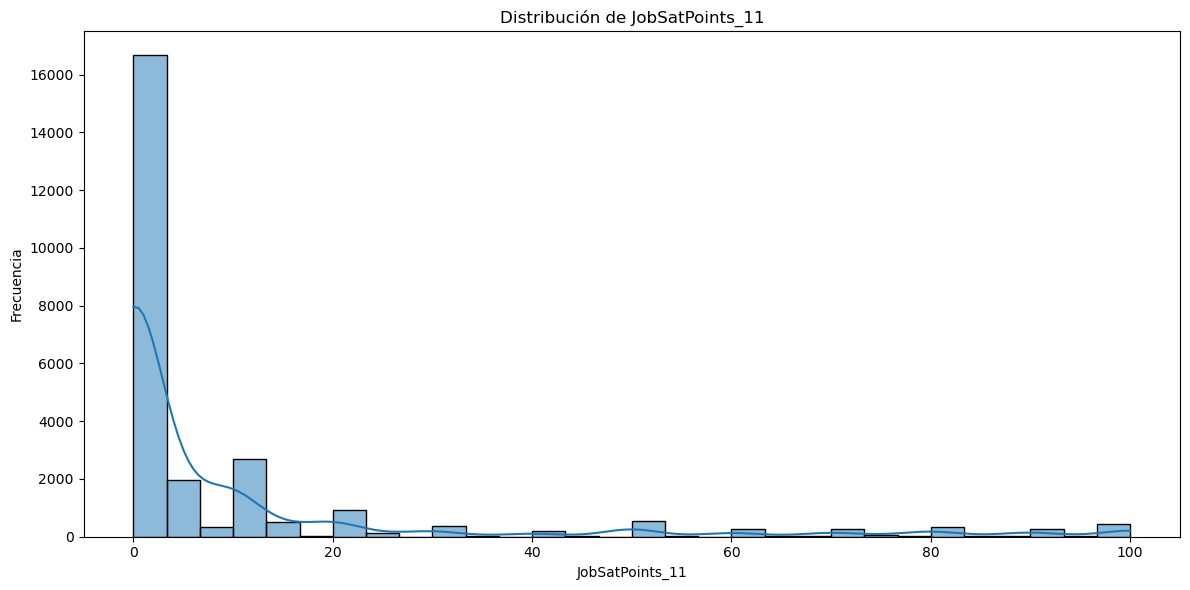


Distribución de la columna ConvertedCompYearly:
count    5.241800e+04
mean     7.249598e+04
std      1.228278e+05
min      1.000000e+00
25%      6.444400e+04
50%      6.444400e+04
75%      6.444400e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


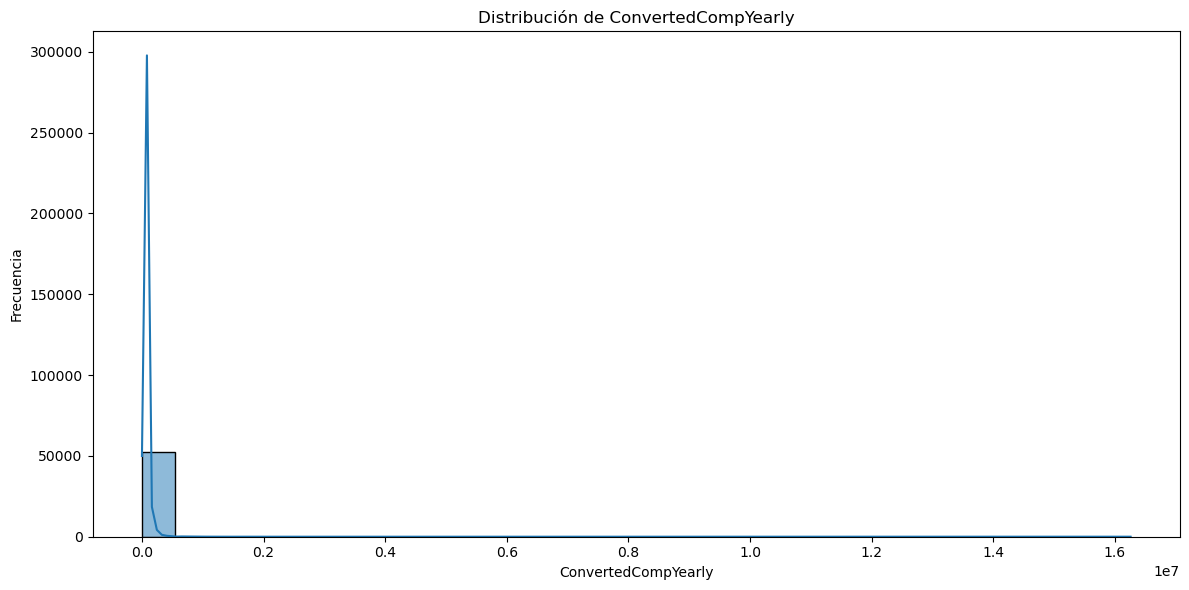


Distribución de la columna JobSat:
count    25845.000000
mean         6.938518
std          2.091186
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64


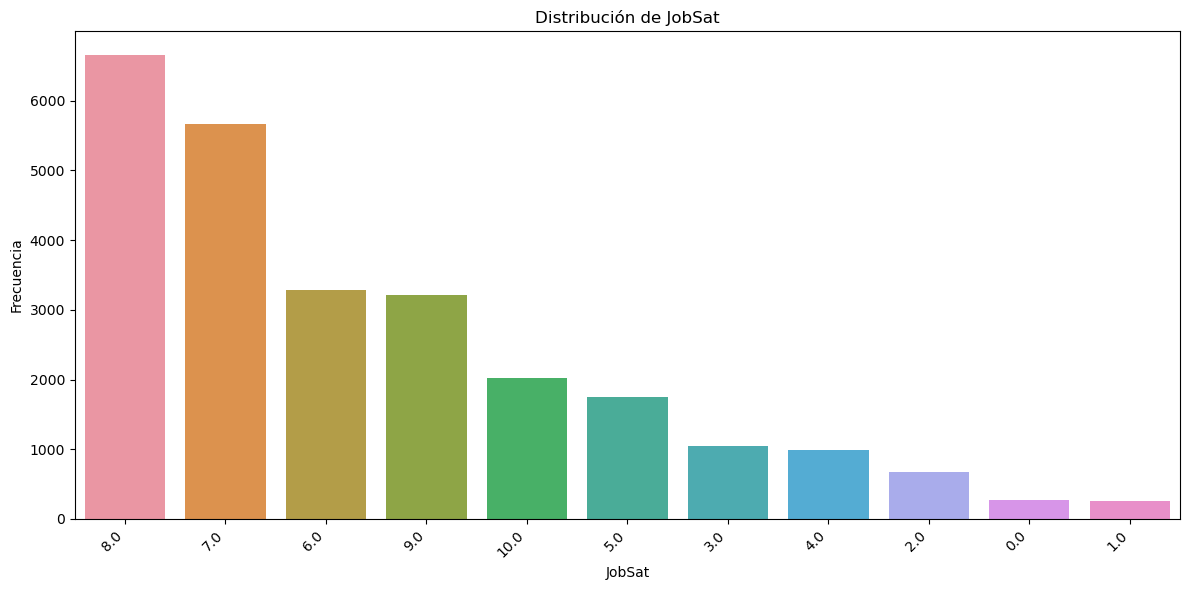

In [41]:
# Paso 1: Crear una lista de palabras clave relacionadas con la compensación
keywords = ['comp', 'salary', 'income', 'pay', 'bonus', 'jobSat', 'level', 'workexp', 'sat', 'job']

# Paso 2: Filtrar las columnas basadas en las palabras clave
columnas_compensacion = [col for col in df.columns if any(keyword in col.lower() for keyword in keywords)]

# Paso 3: Describir las estadísticas de las columnas relacionadas con la compensación
descripcion_compensacion = df[columnas_compensacion].describe()

# Mostrar el listado de columnas relacionadas y sus estadísticas
print("Columnas relacionadas con la compensación:", columnas_compensacion)
print("\nEstadísticas descriptivas de las columnas relacionadas con la compensación:")
print(descripcion_compensacion)

# Describir la distribución de las columnas relacionadas con la compensación
for col in columnas_compensacion:
    print(f"\nDistribución de la columna {col}:")
    print(df[col].describe())

    plt.figure(figsize=(12, 6))
    
    if df[col].dtype == 'object' or df[col].nunique() < 20:  # Para columnas categóricas
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.xticks(rotation=45, ha='right')
    else:  # Para columnas numéricas
        sns.histplot(df[col], kde=True, bins=30)

    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

In [42]:
### Labs 5 - Data Normalization Techniques
### Tarea 25 realizada anteriormente en las tareas 4 y 6.

In [43]:
### Tarea 26: IDENTIFICAR VALORES FALTANTES EN CodingActivities

In [44]:
# 1. Verificar valores faltantes en la columna CodingActivities
faltantes_coding = df['CodingActivities'].isna().sum()
print(f"Valores faltantes en 'CodingActivities': {faltantes_coding}")

# 2. Rellenar los valores faltantes con el texto "No especificado"
df['CodingActivities'] = df['CodingActivities'].fillna('No especificado')

faltantes_coding = df['CodingActivities'].isna().sum()
print(f"Valores faltantes en 'CodingActivities': {faltantes_coding}")

Valores faltantes en 'CodingActivities': 6687
Valores faltantes en 'CodingActivities': 0


In [45]:
# 3. Veridicar valores faltante en ConvertedCompYearly antes de la normalización
faltantes_comp = df['ConvertedCompYearly'].isna().sum()
print(f"Valores faltantes en 'ConvertedCompYearly': {faltantes_comp}")


Valores faltantes en 'ConvertedCompYearly': 0


In [46]:
### Tarea 27 y 28: NORMALIZAR  ConvertedCompYearly USANDO Min-Max Scaling.

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columna_a_normalizar = 'ConvertedCompYearly'

# Normalización Min-Max (valores entre 0 y 1)
scaler_minmax = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler_minmax.fit_transform(df[[columna_a_normalizar]])

# Escalado estándar (media 0, desviación estándar 1)
scaler_standard = StandardScaler()
df['ConvertedCompYearly_Standard'] = scaler_standard.fit_transform(df[[columna_a_normalizar]])

# Verificar resultado
print("\nValores normalizados (primeras filas):")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Standard']].head())


Valores normalizados (primeras filas):
   ConvertedCompYearly  ConvertedCompYearly_MinMax  \
0              64444.0                    0.003964   
1              64444.0                    0.003964   
2              64444.0                    0.003964   
3              64444.0                    0.003964   
4              64444.0                    0.003964   

   ConvertedCompYearly_Standard  
0                     -0.065556  
1                     -0.065556  
2                     -0.065556  
3                     -0.065556  
4                     -0.065556  


In [48]:
### Tarea 29: Aplicar la normalización de la puntuación Z a ConvertedCompYearly.

In [49]:
# Calcular la puntuación Z para la columna 'ConvertedCompYearly'
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()

# Verificar las primeras filas para confirmar que la nueva columna fue creada correctamente
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0              64444.0                   -0.065555
1              64444.0                   -0.065555
2              64444.0                   -0.065555
3              64444.0                   -0.065555
4              64444.0                   -0.065555


In [50]:
### Tarea 30: VISUALIZAR LA DISTRIBUCION DE LOS DATOS ANTES Y DESPUES DE LA NORMALIZACION

C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


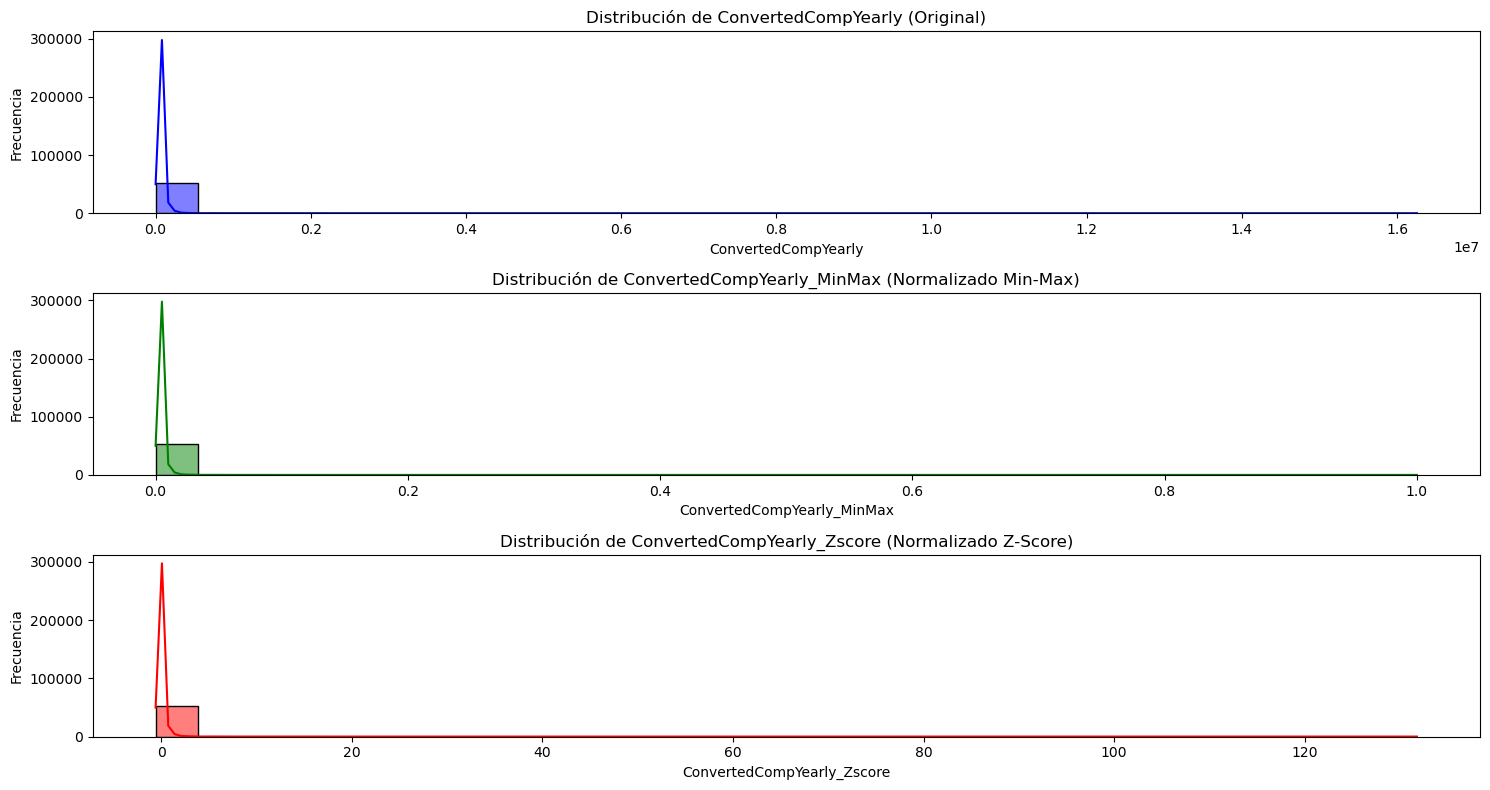

In [51]:
# Visualización de la distribución de las tres columnas de compensación normalizadas
plt.figure(figsize=(15, 8))

# Histograma de ConvertedCompYearly (Original)
plt.subplot(3, 1, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True, bins=30, color='blue')
plt.title("Distribución de ConvertedCompYearly (Original)")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Frecuencia")

# Histograma de ConvertedCompYearly_MinMax (Normalizado Min-Max)
plt.subplot(3, 1, 2)
sns.histplot(df['ConvertedCompYearly_MinMax'], kde=True, bins=30, color='green')
plt.title("Distribución de ConvertedCompYearly_MinMax (Normalizado Min-Max)")
plt.xlabel("ConvertedCompYearly_MinMax")
plt.ylabel("Frecuencia")

# Histograma de ConvertedCompYearly_Zscore (Normalizado Z-Score)
plt.subplot(3, 1, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'], kde=True, bins=30, color='red')
plt.title("Distribución de ConvertedCompYearly_Zscore (Normalizado Z-Score)")
plt.xlabel("ConvertedCompYearly_Zscore")
plt.ylabel("Frecuencia")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


In [52]:
### Labs 6 - Data Wrangling Lab - Explore the DataSet
### Tarea 31 - EXPLORAR DATASET, VALORES NULOS Y FALTANTES Y ESTADISTICAS DESCRIPTIVAS

In [53]:
# 1. Tipos de datos y recuento de valores no nulos por columna
print("Resumen general del DataFrame:")
print(df.info())

# 2. Conteo de valores faltantes por columna
print("\nValores faltantes por columna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# 3. Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas básicas de columnas numéricas:")
print(df.describe())


Resumen general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 52418 entries, 0 to 65435
Columns: 117 entries, ResponseId to ConvertedCompYearly_Zscore
dtypes: float64(16), int64(1), object(100)
memory usage: 47.2+ MB
None

Valores faltantes por columna:
LearnCode            469
LearnCodeOnline    10139
TechDoc            17030
YearsCode            769
YearsCodePro        6433
                   ...  
JobSatPoints_10    26283
JobSatPoints_11    26287
SurveyLength        3874
SurveyEase          3828
JobSat             26573
Length: 105, dtype: int64

Estadísticas básicas de columnas numéricas:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  52418.000000   2.985100e+04  26301.000000    26031.000000   
mean   29710.228738  3.349972e+145     11.736702       18.615996   
std    18132.632844  5.787894e+147      9.348328       26.041468   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    13924.250000   5.626550e+04      5.0000

In [54]:
### Tarea 32 - lIMPIAR COLUMNA COUNTRY DE VALORES INVALIDOS O FALTANTES.

In [55]:
# Estandarizar las entradas en la columna Country

In [56]:
# Crear un diccionario de mapeo para estandarizar las entradas
pais_mapping = {
    'United States of America': 'United States',
    'USA': 'United States',
    'UK': 'United Kingdom',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    # Agrega más mapeos si es necesario
}

# Reemplazar los valores en la columna 'Country' utilizando el diccionario de mapeo
df['Country'] = df['Country'].replace(pais_mapping)


In [57]:
print("Valores únicos en 'Country':")
print(df['Country'].unique())

Valores únicos en 'Country':
['United States' 'United Kingdom' 'Canada' 'Norway' 'Uzbekistan' 'Serbia'
 'Poland' 'Philippines' 'Bulgaria' 'Switzerland' 'India' 'Germany'
 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil' 'Japan' 'Austria'
 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia' 'Romania' 'Turkey'
 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia' 'Pakistan'
 'Czech Republic' 'Republic of North Macedonia' 'Finland' 'Slovakia'
 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 'Venezuela, Bolivaria

In [58]:
# Estandarizar las entradas en la columna EdLevel

In [59]:
# Crear un diccionario de mapeo para estandarizar los niveles de educación
edlevel_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s degree",
    "Some college/university study without earning a degree": "Some college/university study",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional degree",
    "Associate degree (A.A., A.S., etc.)": "Associate degree",
    "Something else": "Other",
    "Primary/elementary school": "Primary/elementary school",
}

# Reemplazar los valores en la columna 'EdLevel' utilizando el diccionario de mapeo
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)


In [60]:
# Comprobacion de los resultados

In [61]:
print("Valores únicos en 'EdLevel':")
print(df['EdLevel'].unique())


Valores únicos en 'EdLevel':
['Primary/elementary school' 'Bachelor’s degree' 'Master’s degree'
 'Some college/university study' 'Secondary school' 'Professional degree'
 'Associate degree' 'Other']


In [62]:
### Tarea 33 - Codificacion One-Hot para la columna Employment

In [63]:
# Verificar los valores únicos en la columna 'Empleo'
unique_values = df['Employment'].unique()
print(f"Valores únicos en 'Employment': {unique_values}")

# Verificar la cantidad de valores faltantes (NaN) en la columna 'Empleo'
missing_values = df['Employment'].isnull().sum()
print(f"Cantidad de valores faltantes en 'Employment': {missing_values}")


Valores únicos en 'Employment': ['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Student, full-time;Not employed, but lo

In [64]:
print(f"Forma original del DataFrame: {df.shape}")


Forma original del DataFrame: (52418, 117)


In [65]:
# Paso 1: Descomponer las combinaciones en 'Employment' por el delimitador ';'
df['Employment_split'] = df['Employment'].str.split(';')

# Paso 2: Crear un nuevo DataFrame de las combinaciones descompuestas (expandir listas)
df_exploded = df.explode('Employment_split')

# Paso 3: Aplicar la codificación one-hot a la columna 'Employment_split'
df_one_hot = pd.get_dummies(df_exploded['Employment_split'], prefix='Employment')

# Paso 4: Volver a agrupar si es necesario para combinar las filas por ID original
df_final = df_one_hot.groupby(df_exploded.index).max()

# Ver el resultado final
print(df_final.head())


   Employment_Employed, full-time  Employment_Employed, part-time  \
0                            True                           False   
1                            True                           False   
2                            True                           False   
3                           False                           False   
4                           False                           False   

   Employment_I prefer not to say  \
0                           False   
1                           False   
2                           False   
3                           False   
4                           False   

   Employment_Independent contractor, freelancer, or self-employed  \
0                                              False                 
1                                              False                 
2                                              False                 
3                                              False                 
4           

In [66]:
# Concatenar el DataFrame original con el DataFrame de la codificación one-hot
df = pd.concat([df, df_final], axis=1)

# Elimino la columna Employment_split porque no es necesario que se guarde
df = df.drop(columns=['Employment_split'])


# Verificar el resultado
df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment                            RemoteWork   Check  \
0  Employed, full-time                                Remote  Apples   
1  Employed, full-time                                Remote  Apples   
2  Employed, full-time                                Remote  Apples   
3   Student, full-time  Hybrid (some remote, some in-person)  Apples   
4   Student, full-time  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                    No especificado   
4                                    No especificado   

                         EdLevel  \
0      Primary/elementary school   
1              Bachelor’s degree   
2                Master’s degree   
3  Some college/university study   
4               Secondary school   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ...  \
0                                                NaN  ...   
1  Technical documentation;Blogs;Books;Written Tu...  ...   
2  Technical documentation;Blogs;Books;Written Tu...  ...   
3  Stack Overflow;How-to videos;Interactive tutorial  ...   
4  Technical documentation;Blogs;Written Tutorial...  ...   

  ConvertedCompYearly_Zscore Employment_Employed, full-time  \
0                  -0.065555                           True   
1                  -0.065555                           True   
2                  -0.065555                           True   
3                  -0.065555                          False   
4                  -0.065555                          False   

  Employment_Employed, part-time Employment_I prefer not to say  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   

  Employment_Independent contractor, freelancer, or self-employed  \
0                                              False                
1                                              False                
2                                              False                
3                                              False                
4                                              False                

  Employment_Not employed, and not looking for work  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

  Employment_Not employed, but looking for work Employment_Retired  \
0                                         False              False   
1                                         False              False   
2                                         False              False   
3                                         False              False   
4                  

In [67]:
### Tarea 34 - Identificado columnas con el  mayor numero de valores faltantes

In [68]:
# Total de filas
total_filas = df.shape[0]

# Crear un DataFrame con número y porcentaje de valores nulos
faltantes = pd.DataFrame({
    'Valores Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / total_filas * 100).round(2)
})

# Ordenar de mayor a menor
faltantes_ordenados = faltantes.sort_values(by='Valores Faltantes', ascending=False)

# Mostrar todos los resultados
pd.set_option('display.max_rows', None)
print(faltantes_ordenados)


                                                    Valores Faltantes  \
AINextMuch less integrated                                      51445   
AINextLess integrated                                           50509   
AINextNo change                                                 41912   
AINextMuch more integrated                                      41015   
EmbeddedAdmired                                                 38268   
EmbeddedWantToWorkWith                                          37553   
EmbeddedHaveWorkedWith                                          33663   
AIToolNot interested in Using                                   31966   
AINextMore integrated                                           31776   
Knowledge_9                                                     27913   
Frequency_3                                                     27845   
Knowledge_8                                                     27807   
ProfessionalTech                                   

In [69]:
### Tarea 35 - Imputar la media o media en columnas numericas

In [70]:
# Seleccionamos solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Imputamos los valores faltantes con la media o la mediana
for col in numeric_cols:
    if df[col].isnull().sum() > 0:  # Solo si tiene nulos
        # Podés elegir entre media o mediana
        # df[col].fillna(df[col].mean(), inplace=True)     # <- con media
        df[col].fillna(df[col].median(), inplace=True)     # <- con mediana


        # Comprobación
        faltantes = df[col].isnull().sum()
        if faltantes == 0:
            print(f"✔️ '{col}': imputación exitosa.")
        else:
            print(f"❌ '{col}': aún hay {faltantes} valores faltantes.")


✔️ 'CompTotal': imputación exitosa.
✔️ 'WorkExp': imputación exitosa.
✔️ 'JobSatPoints_1': imputación exitosa.
✔️ 'JobSatPoints_4': imputación exitosa.
✔️ 'JobSatPoints_5': imputación exitosa.
✔️ 'JobSatPoints_6': imputación exitosa.
✔️ 'JobSatPoints_7': imputación exitosa.
✔️ 'JobSatPoints_8': imputación exitosa.
✔️ 'JobSatPoints_9': imputación exitosa.
✔️ 'JobSatPoints_10': imputación exitosa.
✔️ 'JobSatPoints_11': imputación exitosa.
✔️ 'JobSat': imputación exitosa.


In [71]:
### Tarea 36 - Imputacion con los valores mas frecuentes a las columnas categoricas

In [72]:
# Seleccionamos solo las columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Imputamos los valores faltantes con el valor más frecuente
for col in categorical_cols:
    if df[col].isnull().sum() > 0:  # Solo si tiene nulos
        most_frequent_value = df[col].mode()[0]  # Obtenemos el valor más frecuente
        df[col].fillna(most_frequent_value, inplace=True)
        print(f"✔️ Imputación exitosa para '{col}'.")


✔️ Imputación exitosa para 'LearnCode'.
✔️ Imputación exitosa para 'LearnCodeOnline'.
✔️ Imputación exitosa para 'TechDoc'.
✔️ Imputación exitosa para 'YearsCode'.
✔️ Imputación exitosa para 'YearsCodePro'.
✔️ Imputación exitosa para 'DevType'.
✔️ Imputación exitosa para 'OrgSize'.
✔️ Imputación exitosa para 'PurchaseInfluence'.
✔️ Imputación exitosa para 'BuyNewTool'.
✔️ Imputación exitosa para 'BuildvsBuy'.
✔️ Imputación exitosa para 'TechEndorse'.
✔️ Imputación exitosa para 'Country'.
✔️ Imputación exitosa para 'Currency'.
✔️ Imputación exitosa para 'LanguageHaveWorkedWith'.
✔️ Imputación exitosa para 'LanguageWantToWorkWith'.
✔️ Imputación exitosa para 'LanguageAdmired'.
✔️ Imputación exitosa para 'DatabaseHaveWorkedWith'.
✔️ Imputación exitosa para 'DatabaseWantToWorkWith'.
✔️ Imputación exitosa para 'DatabaseAdmired'.
✔️ Imputación exitosa para 'PlatformHaveWorkedWith'.
✔️ Imputación exitosa para 'PlatformWantToWorkWith'.
✔️ Imputación exitosa para 'PlatformAdmired'.
✔️ Imputació

In [73]:
### Tarea 37 - Escalado Min - Max a columna ConvertedCompYearly

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Inicializamos el escalador
scaler = MinMaxScaler()

# Aplicamos el escalado mínimo-máximo solo a la columna 'ConvertedCompYearly'
df['ConvertedCompYearly_Scaled'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Mostramos un resumen de la columna escalada para verificar
df[['ConvertedCompYearly', 'ConvertedCompYearly_Scaled']].head()


ConvertedCompYearly  ConvertedCompYearly_Scaled
0              64444.0                    0.003964
1              64444.0                    0.003964
2              64444.0                    0.003964
3              64444.0                    0.003964
4              64444.0                    0.003964

In [75]:
### Tarea 38 - Crear la columna "ExperienceLevel" basada en la columna "YearsCodePro"

In [76]:
# Convertir la columna 'YearsCodePro' a numérico, forzando los errores a NaN si no es posible
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Definimos una función para clasificar los niveles de experiencia
def classify_experience(years):
    if years <= 2:
        return 'Principiante'
    elif 3 <= years <= 5:
        return 'Intermedio'
    elif 6 <= years <= 10:
        return 'Avanzado'
    else:
        return 'Experto'

# Aplicamos la función para crear la nueva columna 'ExperienceLevel'
df['ExperienceLevel'] = df['YearsCodePro'].apply(classify_experience)

# Verificamos los primeros registros
df[['YearsCodePro', 'ExperienceLevel']].head()


YearsCodePro ExperienceLevel
0           2.0    Principiante
1          17.0         Experto
2          27.0         Experto
3           2.0    Principiante
4           2.0    Principiante

In [77]:
### Labs 7 - Exploratory Data Analysis
### Tarea 39 - Analizar la relación entre los años de experiencia profesional en programación (YearsCodePro) y la satisfacción laboral (JobSat).

C:\Users\valki\AppData\Local\Temp\ipykernel_70940\2602778360.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
C:\Users\valki\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


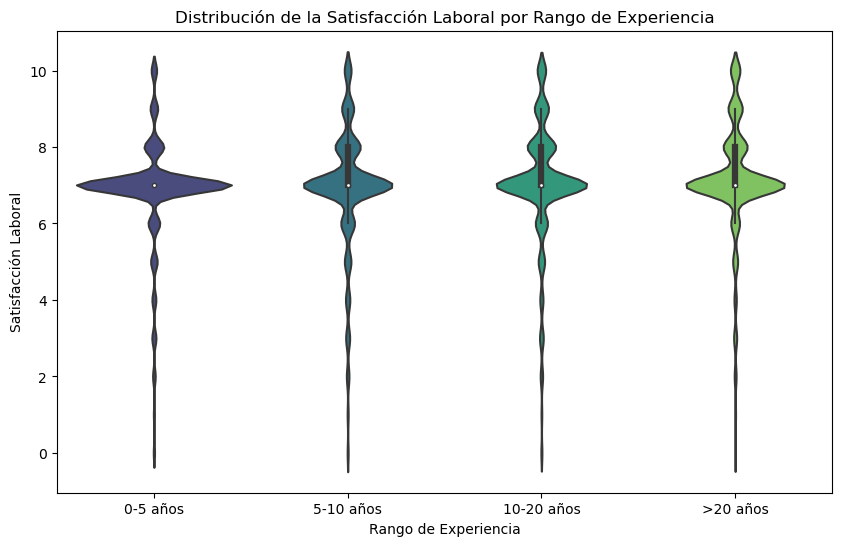

In [78]:
# Paso 1: Crear rangos de experiencia para 'YearsCodePro'
bins = [0, 5, 10, 20, float('inf')]  # Definir los rangos
labels = ['0-5 años', '5-10 años', '10-20 años', '>20 años']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Paso 2: Calcular la mediana de 'JobSat' para cada rango de experiencia
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Paso 3: Visualizar la relación entre los rangos de experiencia y la satisfacción laboral
plt.figure(figsize=(10, 6))
sns.violinplot(x='ExperienceRange', y='JobSat', data=df, palette='viridis')
plt.title('Distribución de la Satisfacción Laboral por Rango de Experiencia')
plt.xlabel('Rango de Experiencia')
plt.ylabel('Satisfacción Laboral')
plt.show()


In [79]:
### Grafico adicional para entender la concentracion de satisfaccion en 7

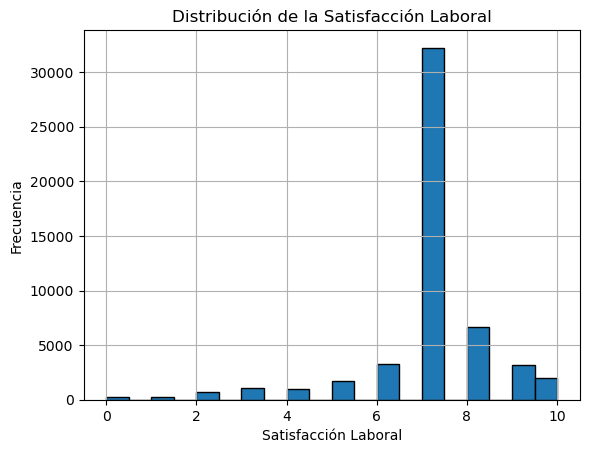

In [80]:
import matplotlib.pyplot as plt
df['JobSat'].hist(bins=20, edgecolor='black')
plt.title('Distribución de la Satisfacción Laboral')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Frecuencia')
plt.show()


In [81]:
### Tarea 40 - Visualizarion de la distribucion de la satisfaccion laboral mediante un countplot

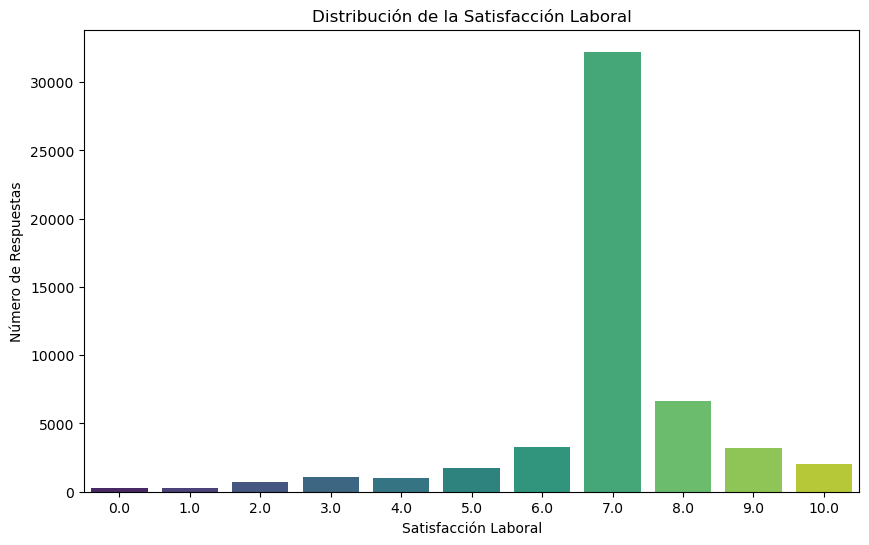

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df, palette='viridis')
plt.title('Distribución de la Satisfacción Laboral')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Número de Respuestas')
plt.show()


In [83]:
### Análisis de las preferencias de trabajo remoto

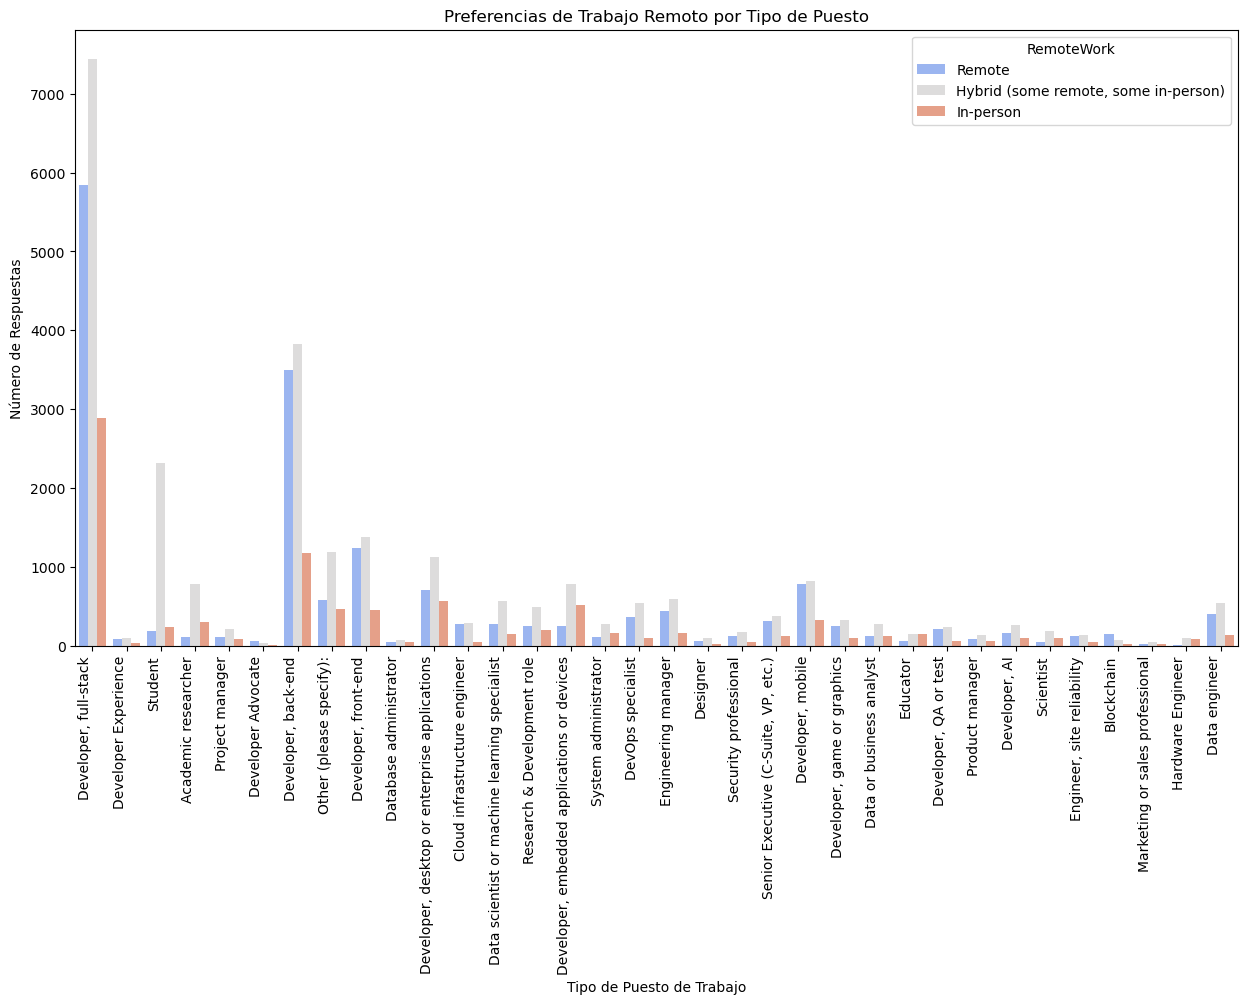

In [84]:
plt.figure(figsize=(15, 8))
sns.countplot(x='DevType', hue='RemoteWork', data=df, palette='coolwarm')
plt.title('Preferencias de Trabajo Remoto por Tipo de Puesto')
plt.xlabel('Tipo de Puesto de Trabajo')
plt.ylabel('Número de Respuestas')
plt.xticks(rotation=90, ha='right')
plt.show()


In [85]:
### Tarea 41
### 1. Gráfico de Conteo para Mostrar la Distribución del Trabajo Remoto

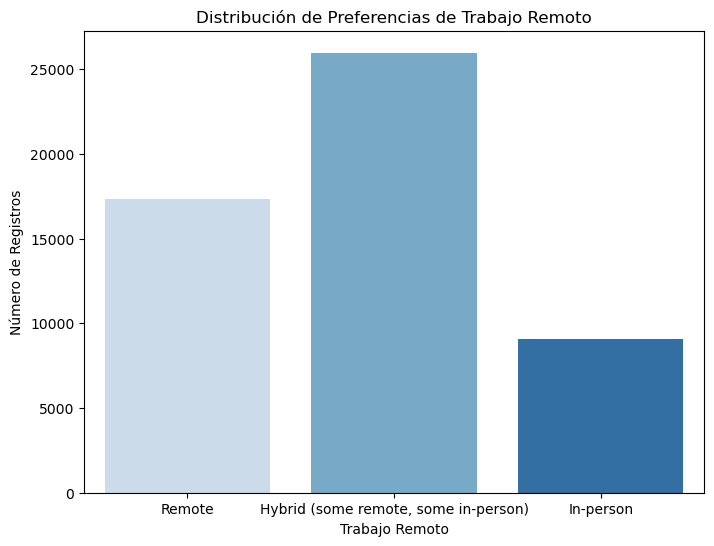

In [86]:
# Gráfico de conteo para mostrar la distribución de las preferencias de trabajo remoto
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RemoteWork', palette='Blues')
plt.title('Distribución de Preferencias de Trabajo Remoto')
plt.xlabel('Trabajo Remoto')
plt.ylabel('Número de Registros')
plt.show()


In [87]:
### 2. Tabulación Cruzada de las Preferencias de Trabajo Remoto por Tipo de Empleo y Puesto de Trabajo

In [88]:
# Crear una nueva columna con la categoría más probable de empleo a partir de las columnas one-hot
employment_cols = [col for col in df.columns if col.startswith('Employment_')]
df['Employment_Label'] = df[employment_cols].idxmax(axis=1).str.replace('Employment_', '')

# Usar esa nueva columna en la tabla cruzada
contingency_table = pd.crosstab([df['Employment_Label'], df['DevType']], df['RemoteWork'])

# Mostrar la tabla
contingency_table

RemoteWork                                                                                        Hybrid (some remote, some in-person)  \
Employment_Label                                   DevType                                                                               
Employed, full-time                                Academic researcher                                                             400   
                                                   Blockchain                                                                       24   
                                                   Cloud infrastructure engineer                                                   243   
                                                   Data engineer                                                                   448   
                                                   Data or business analyst                                                        197   
                                                   Data scientist or machine learning specialist                                   415   
                                                   Database administrator                                                           51   
                                                   Designer                                                                         40   
                                                   DevOps specialist                                                               435   
                                                   Developer Advocate                                                               26   
                                                   Developer Experience                                                             71   
                                                   Developer, AI                                                                   152   
                                                   Developer, QA or test                                                           181   
                                                   Developer, back-end                                                            2858   
                                                   Developer, desktop or enterprise applications                                   815   
                                                   Developer, embedded applications or devices                                     626   
                                                   Developer, front-end                                                            911   
                                                   Developer, full-stack                                                          4893   
                                                   Developer, game or graphics                                                     121   
                                                   Developer, mobile                                                               546   
                                                   Educator                                                                         71   
                                                   Engineer, site reliability                                                      109   
                                                   Engineering manager                                                             544   
                                                   Hardware Engineer                                                                63   
                                                   Marketing or sales professional                                                  29   
                                                   Other (please specify):                                                         598   
                                                   Product manager                                                                 105  

In [89]:
### 3. Visualización de la Tabla Cruzada como un Heatmap

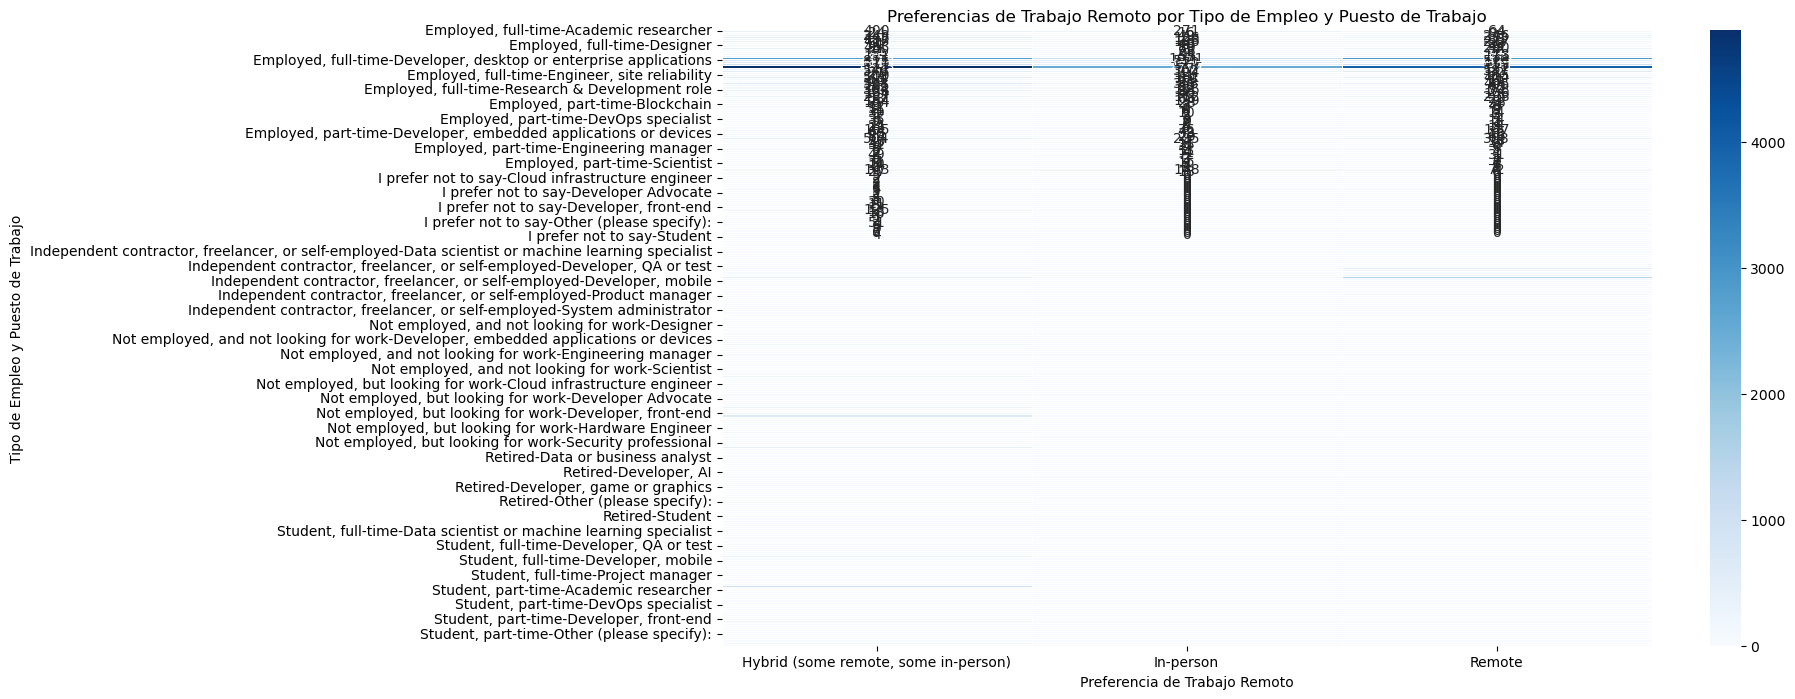

In [90]:
# Crear el heatmap para visualizar la tabulación cruzada
plt.figure(figsize=(15, 8))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Preferencias de Trabajo Remoto por Tipo de Empleo y Puesto de Trabajo')
plt.xlabel('Preferencia de Trabajo Remoto')
plt.ylabel('Tipo de Empleo y Puesto de Trabajo')
plt.show()


In [91]:
### Tarea 42 - Análisis de la popularidad de los lenguajes de programación por región

In [92]:
# 1. Filtrar los datos por país o región
df_region = df[df['Country'] == 'United States']  # Ejemplo con Estados Unidos, puedes cambiar el nombre del país
df_region.head(10)

ResponseId                                         MainBranch  \
0            1                     I am a developer by profession   
5            6                        I code primarily as a hobby   
6            7  I am not primarily a developer, but I write co...   
10          11  I used to be a developer by profession, but no...   
12          13                     I am a developer by profession   
23          24                     I am a developer by profession   
25          26                     I am a developer by profession   
31          32                     I am a developer by profession   
34          35                        I code primarily as a hobby   
35          36                     I am a developer by profession   

                   Age           Employment  \
0   Under 18 years old  Employed, full-time   
5   Under 18 years old   Student, full-time   
6      35-44 years old  Employed, full-time   
10     35-44 years old  Employed, full-time   
12     35-44 years old  Employed, full-time   
23     55-64 years old  Employed, full-time   
25     45-54 years old  Employed, full-time   
31     25-34 years old  Employed, full-time   
34  Under 18 years old   Student, full-time   
35     25-34 years old  Employed, full-time   

                              RemoteWork   Check  \
0                                 Remote  Apples   
5   Hybrid (some remote, some in-person)  Apples   
6                                 Remote  Apples   
10                                Remote  Apples   
12  Hybrid (some remote, some in-person)  Apples   
23  Hybrid (some remote, some in-person)  Apples   
25  Hybrid (some remote, some in-person)  Apples   
31  Hybrid (some remote, some in-person)  Apples   
34  Hybrid (some remote, some in-person)  Apples   
35                                Remote  Apples   

                                     CodingActivities  \
0                                               Hobby   
5                                     No especificado   
6                        I don’t code outside of work   
10           Hobby;Contribute to open-source projects   
12  Hobby;Contribute to open-source projects;Profe...   
23  Contribute to open-source projects;Other (plea...   
25                      Hobby;Freelance/contract work   
31                            Freelance/contract work   
34                                    No especificado   
35                      Hobby;Freelance/contract work   

                          EdLevel  \
0       Primary/elementary school   
5       Primary/elementary school   
6             Professional degree   
10              Bachelor’s degree   
12              Bachelor’s degree   
23              Bachelor’s degree   
25               Associate degree   
31              Bachelor’s degree   
34               Secondary school   
35  Some college/university study   

                                            LearnCode  \
0                              Books / Physical media   
5   School (i.e., University, College, etc);Online...   
6   Other online resources (e.g., videos, blogs, f...   
10  Books / Physical media;Other online resources ...   
12  Books / Physical media;On the job training;Sch...   
23  Other online resources (e.g., videos, blogs, f...   
25  Books / Physical media;Colleague;On the job tr...   
31  Colleague;On the job training;School (i.e., Un...   
34  On the job training;Other online resources (e....   
35  Books / Physical media;On the job training;Oth...   

                                      LearnCodeOnline  ...  \
0   Technical documentation;Blogs;Written Tutorial...  ...   
5   Technical documentation;Blogs;Written Tutorial...  ...   
6   Technical documentation;Stack Overflow;Written...  ...   
10  Technical documentation;Books;Written Tutorial...  ...   
12  Technical documentation;Blogs;Written Tutorial...  ...   
23  Technical documentation;Blogs;Stack Overflow;S...  ...   
25  Technical documentation;Books;Written Tutorial...  

In [93]:
# 2. Visualización de los principales lenguajes de programación por región con un gráfico de barras

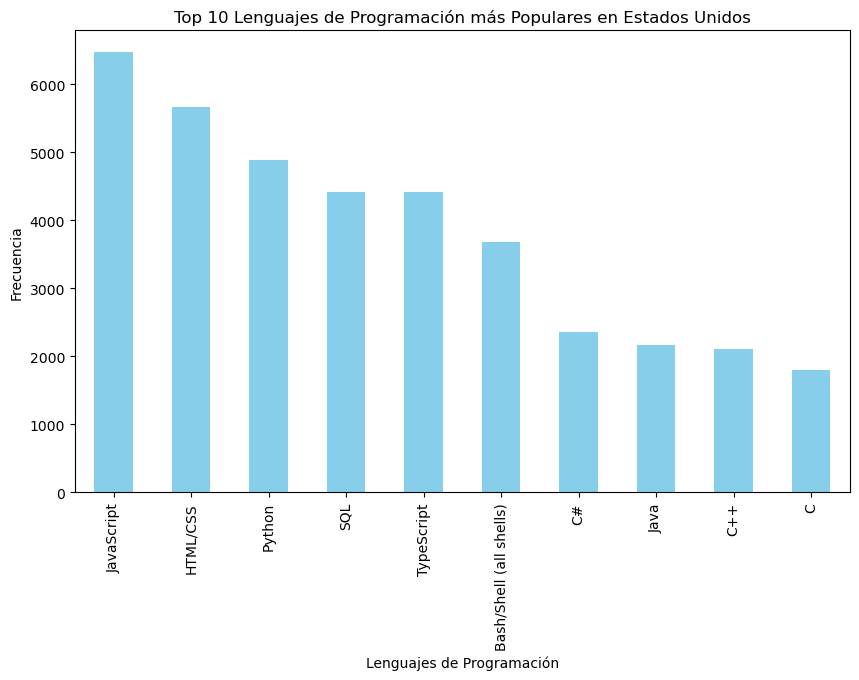

In [94]:
# Contamos la frecuencia de los lenguajes de programación en la región seleccionada
languages_count = df_region['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()

# Mostrar los 10 lenguajes más populares en la región
top_languages = languages_count.head(10)

# Visualización de los lenguajes más populares
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar', color='skyblue')
plt.title('Top 10 Lenguajes de Programación más Populares en Estados Unidos')
plt.xlabel('Lenguajes de Programación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


In [95]:
### Tarea 43 - correlación entre los años de experiencia profesional (YearsCodePro) y la satisfacción laboral (JobSatPoints_1)

In [96]:
# 1. Verificar que ambas columnas sean numéricas
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# 2. Verificar nulos
print(df[['YearsCodePro', 'JobSatPoints_1']].isnull().sum())


YearsCodePro      2506
JobSatPoints_1       0
dtype: int64


In [97]:
# 3. Eliminar filas con nulos solo si es necesario
df_corr = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# 4. Verificar nulos nuevamente
print(df_corr[['YearsCodePro', 'JobSatPoints_1']].isnull().sum())

YearsCodePro      0
JobSatPoints_1    0
dtype: int64


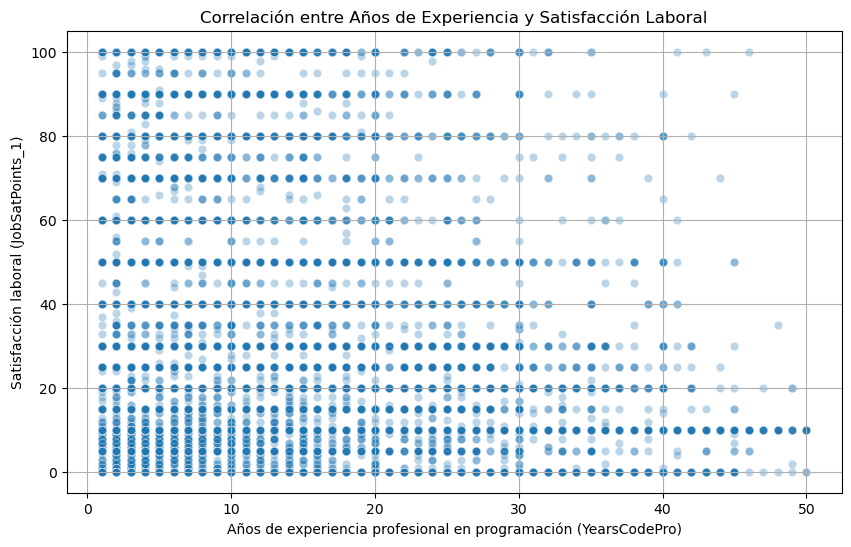

In [98]:
# 4. Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', alpha=0.3)
plt.title('Correlación entre Años de Experiencia y Satisfacción Laboral')
plt.xlabel('Años de experiencia profesional en programación (YearsCodePro)')
plt.ylabel('Satisfacción laboral (JobSatPoints_1)')
plt.grid(True)
plt.show()

In [99]:
# Calcular la correlación de Pearson
correlation = df_corr['YearsCodePro'].corr(df_corr['JobSatPoints_1'], method='pearson')
print(f"Coeficiente de correlación de Pearson: {correlation:.4f}")

Coeficiente de correlación de Pearson: -0.0048


In [100]:
### Tarea 44 - Relacion entre Nivel educativo y tipo de empleo

In [101]:
# Crear la tabla cruzada entre EdLevel (formación académica) y Employment_Label (tipo de empleo)
contingency_table2 = pd.crosstab(df['EdLevel'], df['Employment_Label'])

# Mostrar la tabla
print(contingency_table2)


Employment_Label               Employed, full-time  Employed, part-time  \
EdLevel                                                                   
Associate degree                              1222                  111   
Bachelor’s degree                            15613                 1187   
Master’s degree                              11155                  623   
Other                                          441                   62   
Primary/elementary school                      201                   71   
Professional degree                           2261                  127   
Secondary school                              1786                  561   
Some college/university study                 4273                  608   

Employment_Label               I prefer not to say  \
EdLevel                                              
Associate degree                                 9   
Bachelor’s degree                               99   
Master’s degree                  

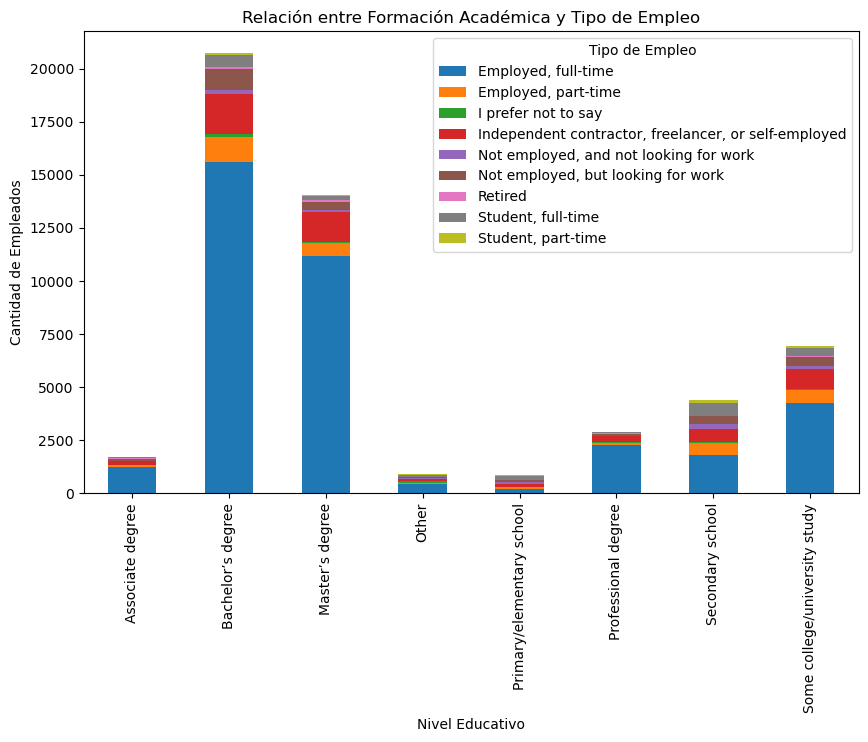

In [102]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras apiladas
contingency_table2.plot(kind='bar', stacked=True, figsize=(10,6))

# Configurar el título y las etiquetas
plt.title('Relación entre Formación Académica y Tipo de Empleo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Tipo de Empleo')
plt.show()


In [103]:
### Tarea 45 - Guardar el df
# Guardar solo el DataFrame depurado
df.to_csv('df_limpio1.csv', index=False)


In [104]:
### Laboratorio 8 - Determinación de la distribución de los datos
### Tarea 46: Examinar la estructura de los datos

In [105]:
df.isnull().sum()

ResponseId                                                            0
MainBranch                                                            0
Age                                                                   0
Employment                                                            0
RemoteWork                                                            0
Check                                                                 0
CodingActivities                                                      0
EdLevel                                                               0
LearnCode                                                             0
LearnCodeOnline                                                       0
TechDoc                                                               0
YearsCode                                                             0
YearsCodePro                                                       2506
DevType                                                         

In [106]:
# 1. Mostrar los nombres de las columnas y los tipos de datos
print(df.dtypes)

ResponseId                                                            int64
MainBranch                                                           object
Age                                                                  object
Employment                                                           object
RemoteWork                                                           object
Check                                                                object
CodingActivities                                                     object
EdLevel                                                              object
LearnCode                                                            object
LearnCodeOnline                                                      object
TechDoc                                                              object
YearsCode                                                            object
YearsCodePro                                                        float64
DevType     

In [107]:
# 2. Información resumida del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52418 entries, 0 to 65435
Columns: 130 entries, ResponseId to Employment_Label
dtypes: bool(9), category(1), float64(18), int64(1), object(101)
memory usage: 48.9+ MB
None


In [108]:
# 3. Ver las primeras filas del DataFrame
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment                            RemoteWork   Check  \
0  Employed, full-time                                Remote  Apples   
1  Employed, full-time                                Remote  Apples   
2  Employed, full-time                                Remote  Apples   
3   Student, full-time  Hybrid (some remote, some in-person)  Apples   
4   Student, full-time  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source proje

In [109]:
# 4. Estadísticas descriptivas para las columnas numéricas
print(df.describe())

         ResponseId  YearsCodePro      CompTotal       WorkExp  \
count  52418.000000  49912.000000   5.241800e+04  52418.000000   
mean   29710.228738      9.870432  1.907742e+145     10.373154   
std    18132.632844      9.046370  4.367770e+147      6.761699   
min        1.000000      1.000000   0.000000e+00      0.000000   
25%    13924.250000      3.000000   9.000000e+04      9.000000   
50%    28919.500000      7.000000   1.050000e+05      9.000000   
75%    44823.750000     14.000000   1.250000e+05     10.000000   
max    65436.000000     50.000000  1.000000e+150     50.000000   

       JobSatPoints_1  JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  \
count    52418.000000    52418.000000    52418.000000    52418.000000   
mean        14.278740        3.846098        5.021116       22.111797   
std         18.850145       13.730938       16.194814       19.258394   
min          0.000000        0.000000        0.000000        0.000000   
25%         10.000000        0.000000   

In [110]:
### Tarea 47 - Gestionar datos faltantes

In [111]:
# Identificar valores faltantes
missing_values = df.isnull().sum()

# Mostrar columnas con valores faltantes
print(missing_values[missing_values > 0])


YearsCodePro       2506
ExperienceRange    2506
dtype: int64


In [112]:
# Imputar con la mediana en 'YearsCodePro'
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())

# Imputar con la moda en 'ExperienceRange'
df['ExperienceRange'] = df['ExperienceRange'].fillna(df['ExperienceRange'].mode()[0])

# Verificar si aún hay valores faltantes en las columnas
missing_values_after = df[['YearsCodePro', 'ExperienceRange']].isnull().sum()
print(missing_values_after)


YearsCodePro       0
ExperienceRange    0
dtype: int64


In [113]:
### Tarea 48: Analizar columnas clave
# 1. Examine columnas clave como Empleo, Satisfacción Laboral y AñosCodificados (Experiencia Profesional en Programación).
# 2. Instrucciones: Calcule los valores de cada columna para comprender la distribución de las respuestas.

In [114]:
# Filtrar solo las columnas relacionadas con Employment (las generadas por One-Hot Encoding)
#empleo_columns = [col for col in df.columns if 'Employment_' in col]
empleo_columns = [col for col in df.columns if col.startswith('Employment_') and col != 'Employment_Label']

# Asegurarse de que las columnas de Employment sean de tipo booleano
df[empleo_columns] = df[empleo_columns].astype(bool)

# Calcular el recuento de valores 'True' en cada columna one-hot (en formato booleano)
empleo_recuento_onehot = df[empleo_columns].sum()  # .sum() cuenta los 'True' (equivalente a 1)

# Mostrar los resultados
print("Recuento de valores para las columnas 'Employment' codificadas One-Hot:")
print(empleo_recuento_onehot)

# Calcular el recuento de valores para la columna 'JobSat' (Satisfacción laboral)
satisfaccion_laboral_recuento = df['JobSat'].value_counts()

# Calcular el recuento de valores para la columna 'YearsCodePro' (Experiencia profesional en programación)
years_code_pro_recuento = df['YearsCodePro'].value_counts()

# Mostrar los resultados
print("\nRecuento de valores para la columna 'JobSat':")
print(satisfaccion_laboral_recuento)

print("\nRecuento de valores para la columna 'YearsCodePro':")
print(years_code_pro_recuento)


Recuento de valores para las columnas 'Employment' codificadas One-Hot:
Employment_Employed, full-time                                     36952
Employment_Employed, part-time                                      3829
Employment_I prefer not to say                                       433
Employment_Independent contractor, freelancer, or self-employed     9811
Employment_Not employed, and not looking for work                    986
Employment_Not employed, but looking for work                       3178
Employment_Retired                                                   539
Employment_Student, full-time                                       5475
Employment_Student, part-time                                       2398
dtype: int64

Recuento de valores para la columna 'JobSat':
JobSat
7.0     32234
8.0      6663
6.0      3291
9.0      3216
10.0     2026
5.0      1744
3.0      1051
4.0       991
2.0       679
0.0       273
1.0       250
Name: count, dtype: int64

Recuento de valores par

In [115]:
### Tarea 49 - Visualización de la satisfaccion laboral

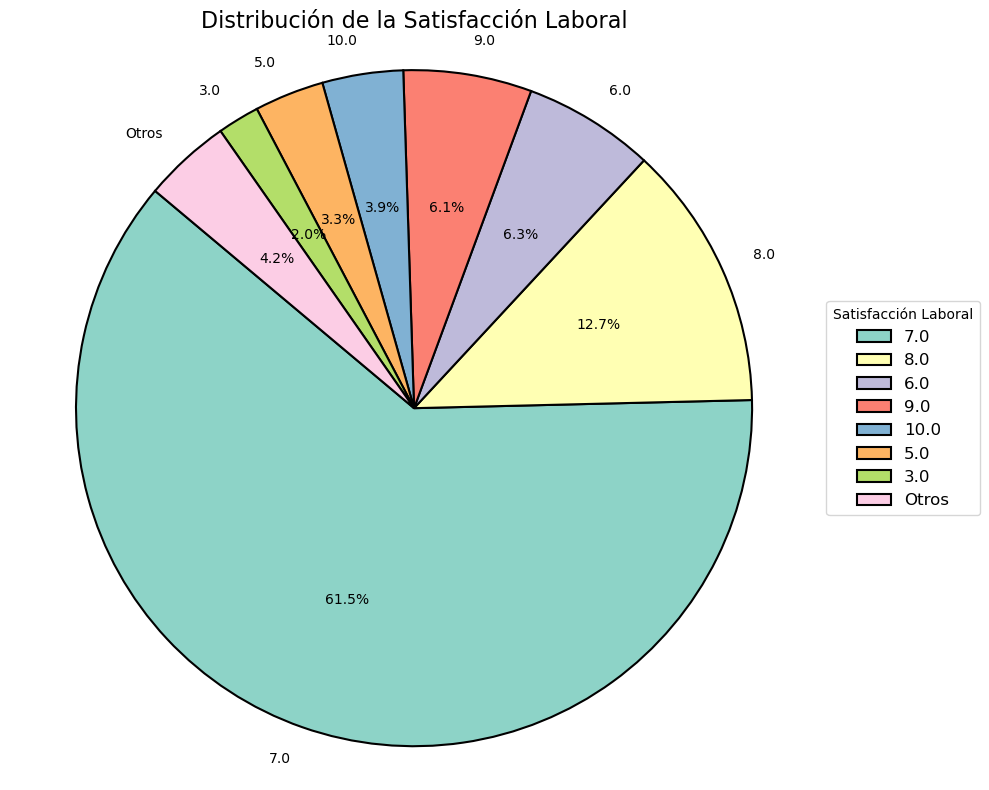

C:\Users\valki\AppData\Local\Temp\ipykernel_70940\1587539772.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['JobSat'], shade=True, color="b")
C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


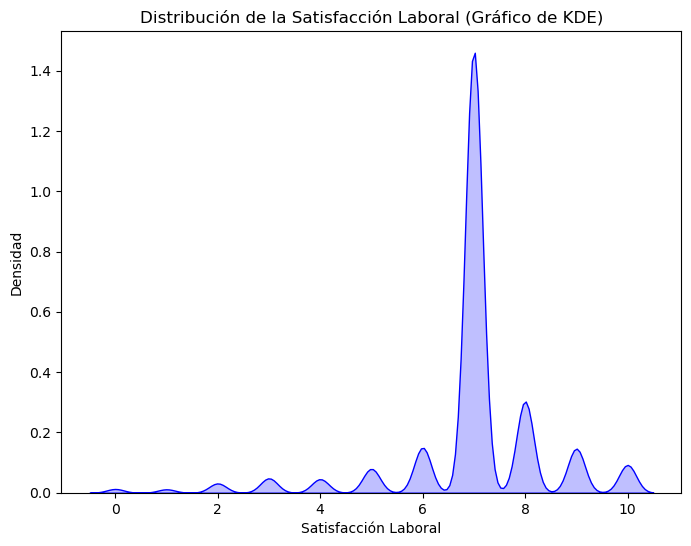

In [116]:
# Supongamos que tu DataFrame se llama 'df'
job_sat_counts = df['JobSat'].value_counts()

# Definir un umbral para agrupar categorías pequeñas (opcional, pero recomendable)
umbral = 0.02
otros_counts = job_sat_counts[job_sat_counts / job_sat_counts.sum() < umbral].sum()
job_sat_counts_filtrado = job_sat_counts[job_sat_counts / job_sat_counts.sum() >= umbral]
if otros_counts > 0:
    job_sat_counts_filtrado['Otros'] = otros_counts

# Crear la lista 'explode'
# Inicialmente, todas las porciones no estarán separadas (valor 0)
explode = [0] * len(job_sat_counts_filtrado)

# Puedes destacar una porción específica si lo deseas, por ejemplo, la primera:
# explode[0] = 0.1

# 1. Crear un gráfico circular con porciones separadas
plt.figure(figsize=(10, 8))
plt.pie(job_sat_counts_filtrado,
        labels=job_sat_counts_filtrado.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("Set3", len(job_sat_counts_filtrado)),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
        textprops={'fontsize': 10},
        explode=explode)  # Añadir el parámetro explode

# Ajuste en la posición del título
plt.title('Distribución de la Satisfacción Laboral', fontsize=16)

# Mejorar la leyenda
plt.legend(job_sat_counts_filtrado.index, title="Satisfacción Laboral", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

# Asegurar que el círculo se dibuje como un círculo
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Crear un gráfico de KDE (Kernel Density Estimate) para visualizar la distribución de satisfacción laboral
plt.figure(figsize=(8, 6))
sns.kdeplot(df['JobSat'], shade=True, color="b")
plt.title('Distribución de la Satisfacción Laboral (Gráfico de KDE)')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Densidad')
plt.show()


In [117]:
### Tarea 50 - Análisis de lenguajes de programación

In [118]:
# 1. Calcular la frecuencia de lenguajes en ambas columnas
from collections import Counter

# Función para calcular la frecuencia de lenguajes de programación en una columna
def get_language_frequencies(column):
    # Convertir las listas de lenguajes (suponiendo que las celdas contienen cadenas de texto separadas por punto y comas)
    languages = column.dropna().apply(lambda x: x.split(';'))
    # Contar la frecuencia de cada lenguaje
    flat_languages = [lang.strip() for sublist in languages for lang in sublist]
    return dict(Counter(flat_languages))

# Frecuencia de lenguajes en 'LanguageHaveWorkedWith'
worked_with_freq = get_language_frequencies(df['LanguageHaveWorkedWith'])

# Frecuencia de lenguajes en 'LanguageWantToWorkWith'
want_to_work_with_freq = get_language_frequencies(df['LanguageWantToWorkWith'])

# Mostrar las frecuencias
print("Lenguajes trabajados:", worked_with_freq)
print("Lenguajes deseados:", want_to_work_with_freq)


Lenguajes trabajados: {'HTML/CSS': 28577, 'JavaScript': 33330, 'TypeScript': 21550, 'Bash/Shell (all shells)': 17434, 'Go': 6911, 'Java': 14880, 'Python': 25715, 'C#': 13845, 'C': 10075, 'C++': 11477, 'PHP': 9413, 'PowerShell': 7106, 'SQL': 25919, 'Lua': 3050, 'Rust': 6286, 'Swift': 2450, 'R': 2288, 'Ruby': 2606, 'Delphi': 987, 'VBA': 2010, 'Visual Basic (.Net)': 2152, 'F#': 449, 'Clojure': 616, 'Scala': 1332, 'Perl': 1314, 'MATLAB': 2023, 'OCaml': 371, 'Assembly': 2668, 'Dart': 3014, 'Fortran': 589, 'Julia': 606, 'Crystal': 216, 'Kotlin': 4781, 'Lisp': 743, 'Prolog': 402, 'Haskell': 969, 'Ada': 461, 'Elixir': 1074, 'Erlang': 454, 'Groovy': 1740, 'Zig': 541, 'GDScript': 1117, 'MicroPython': 744, 'Objective-C': 1128, 'Cobol': 362, 'Nim': 179, 'Apex': 432, 'Solidity': 547, 'Zephyr': 158}
Lenguajes deseados: {'Python': 26649, 'Bash/Shell (all shells)': 11733, 'Go': 11540, 'HTML/CSS': 17251, 'Java': 8581, 'JavaScript': 19753, 'Kotlin': 6134, 'TypeScript': 16836, 'C#': 10820, 'PowerShell': 

<Figure size 1200x800 with 0 Axes>

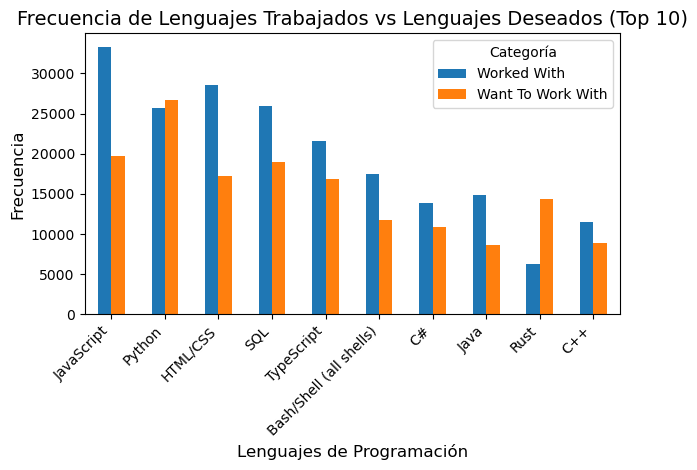

In [119]:
# 2. Gráfico de barras agrupadas:
# Convertir las frecuencias a DataFrames para facilitar la visualización
worked_with_df = pd.DataFrame.from_dict(worked_with_freq, orient='index', columns=['Worked With'])
want_to_work_with_df = pd.DataFrame.from_dict(want_to_work_with_freq, orient='index', columns=['Want To Work With'])

# Unir los DataFrames
languages_df = pd.merge(worked_with_df, want_to_work_with_df, left_index=True, right_index=True, how='outer')

# Ordenar por la suma de las frecuencias para visualizar los lenguajes más populares
languages_df['Total'] = languages_df['Worked With'] + languages_df['Want To Work With']
languages_df = languages_df.sort_values('Total', ascending=False)

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
languages_df[['Worked With', 'Want To Work With']].head(10).plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])

# Etiquetas y título
plt.title('Frecuencia de Lenguajes Trabajados vs Lenguajes Deseados (Top 10)', fontsize=14)
plt.xlabel('Lenguajes de Programación', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría', loc='upper right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [120]:
pip install matplotlib-venn


Note: you may need to restart the kernel to use updated packages.


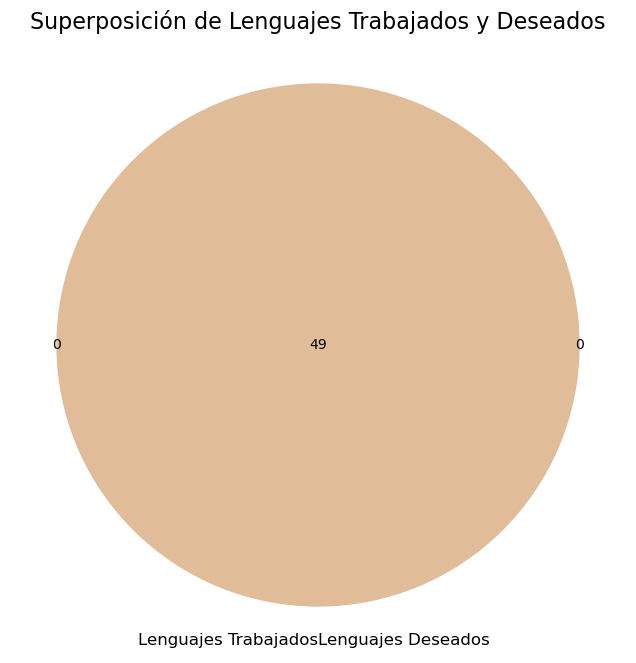

In [121]:
from matplotlib_venn import venn2, venn2_circles

# Crear los conjuntos de lenguajes trabajados y deseados
set_worked_with = set(worked_with_freq.keys())
set_want_to_work_with = set(want_to_work_with_freq.keys())

# Crear diagrama de Venn
plt.figure(figsize=(8, 8))
venn2([set_worked_with, set_want_to_work_with], set_labels=('Lenguajes Trabajados', 'Lenguajes Deseados'))

# Título
plt.title('Superposición de Lenguajes Trabajados y Deseados', fontsize=16)

# Mostrar el gráfico
plt.show()

In [122]:
### Tarea 51 - Análisis de tendencias de teletrabajo

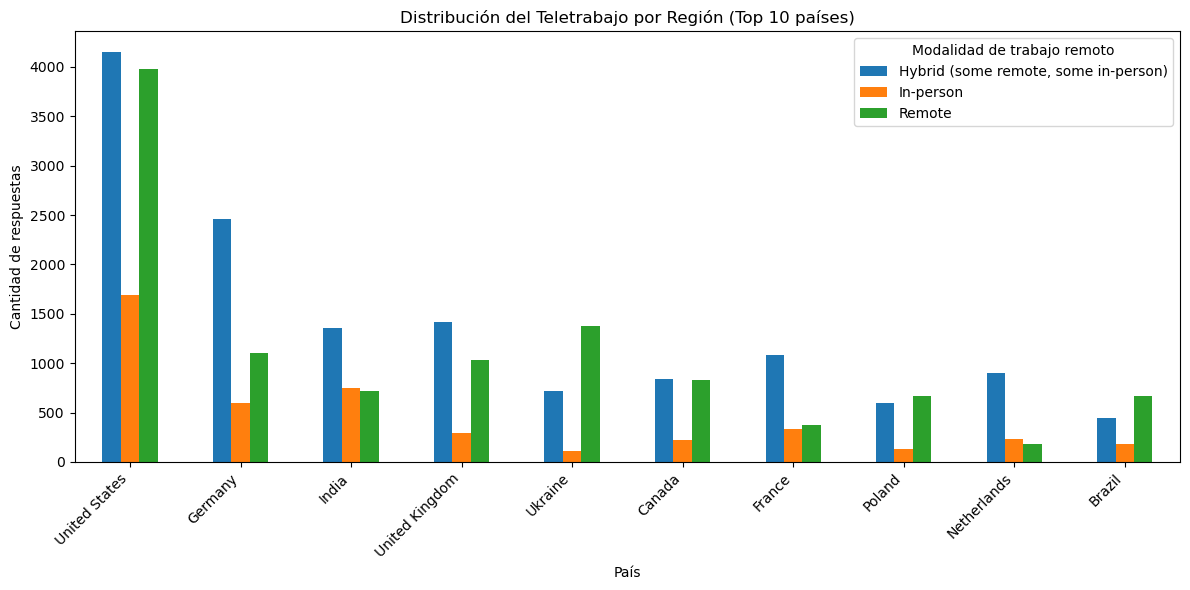

In [123]:
# 1. Gráfico de barras apiladas

# Crear tabla cruzada entre país (o región) y tipo de trabajo remoto
# Asegúrate de que 'Country' y 'RemoteWork' existen en tu df
tabla_remota = pd.crosstab(df['Country'], df['RemoteWork'])

# Tomar solo los países con más respuestas (opcional para no hacer una gráfica enorme)
top_paises = tabla_remota.sum(axis=1).sort_values(ascending=False).head(10).index
tabla_filtrada = tabla_remota.loc[top_paises]

# Crear gráfico de barras agrupadas
tabla_filtrada.plot(kind='bar', figsize=(12, 6))
plt.title('Distribución del Teletrabajo por Región (Top 10 países)')
plt.xlabel('País')
plt.ylabel('Cantidad de respuestas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Modalidad de trabajo remoto')
plt.tight_layout()
plt.show()


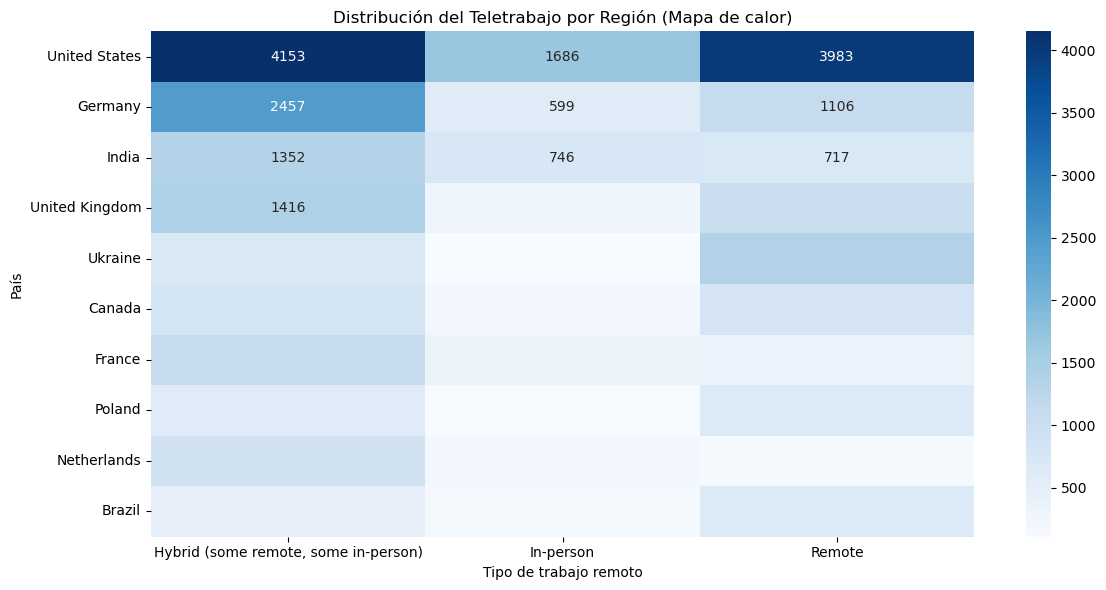

In [124]:
# 2. Heatmap

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(tabla_filtrada, annot=True, fmt='d', cmap='Blues')
plt.title('Distribución del Teletrabajo por Región (Mapa de calor)')
plt.xlabel('Tipo de trabajo remoto')
plt.ylabel('País')
plt.tight_layout()
plt.show()


In [125]:
### Tarea 52 - Correlación entre la satisfacción laboral y la experiencia

In [126]:
df.dtypes

ResponseId                                                            int64
MainBranch                                                           object
Age                                                                  object
Employment                                                           object
RemoteWork                                                           object
Check                                                                object
CodingActivities                                                     object
EdLevel                                                              object
LearnCode                                                            object
LearnCodeOnline                                                      object
TechDoc                                                              object
YearsCode                                                            object
YearsCodePro                                                        float64
DevType     

In [127]:
# 1. Analisis de la correlación entre la satisfacción laboral general (JobSat) y YearsCodePro.

df_corr = df[['YearsCodePro', 'JobSat']].copy()  # <-- importante: copy() para evitar errores extraños
df_corr = df_corr.dropna()

# 2. Calculo la relacion de pearson y la de Spearman

# Pearson
pearson_corr = df_corr['YearsCodePro'].corr(df_corr['JobSat'], method='pearson')

# Spearman
spearman_corr = df_corr['YearsCodePro'].corr(df_corr['JobSat'], method='spearman')

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.3f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.3f}")


Coeficiente de correlación de Pearson: 0.072
Coeficiente de correlación de Spearman: 0.098


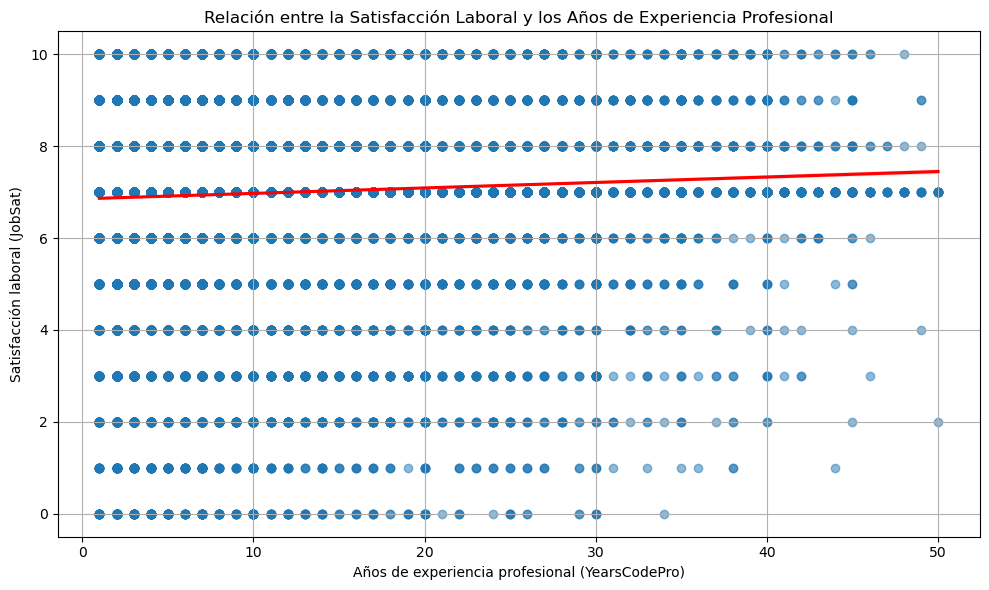

In [128]:
# Crear el gráfico de dispersión con una línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(data=df_corr, x='YearsCodePro', y='JobSat', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relación entre la Satisfacción Laboral y los Años de Experiencia Profesional')
plt.xlabel('Años de experiencia profesional (YearsCodePro)')
plt.ylabel('Satisfacción laboral (JobSat)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
### Tarea 53 - Análisis de tabulación cruzada (Empleo vs. Nivel educativo)

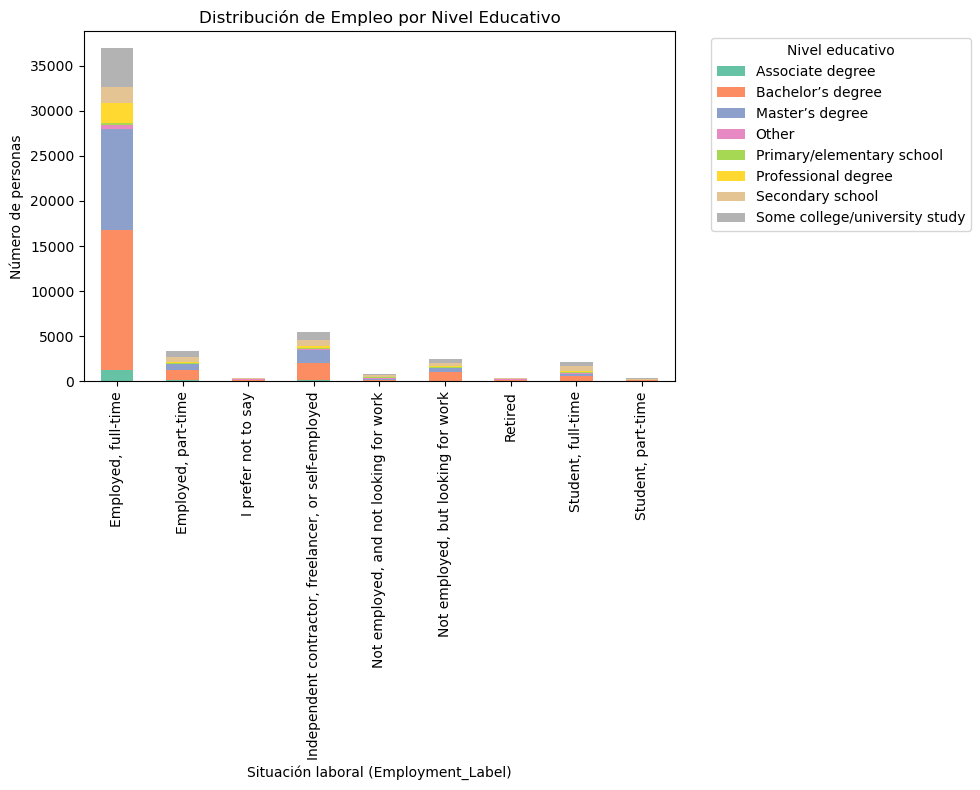

In [130]:
# Crear la tabulación cruzada entre Employment_Label y EdLevel
tabla_cruzada = pd.crosstab(df['Employment_Label'], df['EdLevel'])

# Visualizar la tabulación cruzada en un gráfico de barras apiladas
tabla_cruzada.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='Set2')

# Agregar título y etiquetas
plt.title('Distribución de Empleo por Nivel Educativo')
plt.xlabel('Situación laboral (Employment_Label)')
plt.ylabel('Número de personas')
plt.xticks(rotation=90)
plt.legend(title='Nivel educativo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


In [131]:
# Exportar el DataFrame limpio a un archivo CSV
df.to_csv('datos_limpios2.csv', index=False)

print("El conjunto de datos limpio ha sido exportado exitosamente a 'datos_limpios2.csv'.")


El conjunto de datos limpio ha sido exportado exitosamente a 'datos_limpios2.csv'.


In [132]:
### Labs 9 - Detección de valores atípicos

In [133]:
### Tarea 55 - Gráfica de la distribución de la industria

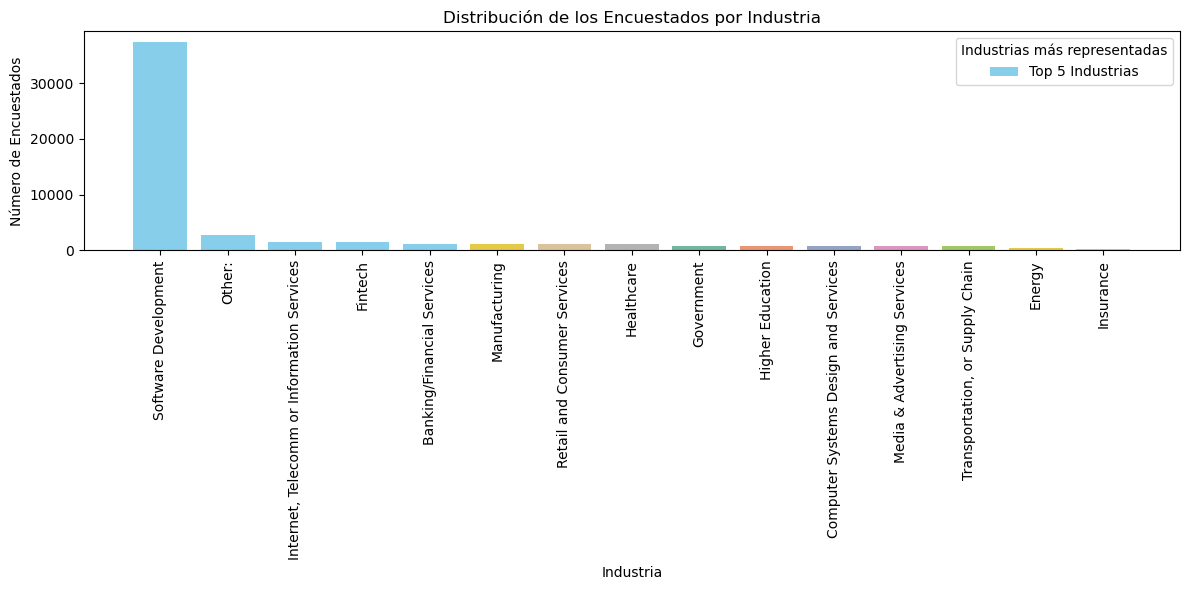

In [134]:
# Filtrar los valores nulos de la columna 'Industry' para evitar problemas en el gráfico
df_industry = df['Industry'].dropna()

# Contar la cantidad de encuestados por industria
industry_counts = df_industry.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='Set2')

# Personalizar el gráfico
plt.title('Distribución de los Encuestados por Industria')
plt.xlabel('Industria')
plt.ylabel('Número de Encuestados')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si son largas
plt.tight_layout()

# Resaltar las tendencias notables: por ejemplo, resaltar las 5 principales industrias
top_industries = industry_counts.head(5)
plt.bar(top_industries.index, top_industries.values, color='skyblue', label='Top 5 Industrias')

# Agregar leyenda y mostrar el gráfico
plt.legend(title='Industrias más representadas')
plt.show()


In [135]:
### Tarea 56 - Identificar valores atípicos de compensación alta

In [136]:
# 1. Calcular estadísticas básicas
media = df['ConvertedCompYearly'].mean()
mediana = df['ConvertedCompYearly'].median()
desviacion = df['ConvertedCompYearly'].std()

print(f"Media: {media:,.2f}")
print(f"Mediana: {mediana:,.2f}")
print(f"Desviación estándar: {desviacion:,.2f}")

# 2. Definir el umbral para considerar valores atípicos (outliers)
umbral_superior = media + 3 * desviacion
print(f"Umbral para compensaciones extremadamente altas (> media + 3*std): {umbral_superior:,.2f}")

# 3. Filtrar los encuestados con compensación anual extremadamente alta
outliers = df[df['ConvertedCompYearly'] > umbral_superior]

# Mostrar los primeros casos de outliers
print("\nEncuestados con compensación anual extremadamente alta:")
print(outliers[['ResponseId', 'ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False).head(10))


Media: 72,495.98
Mediana: 64,444.00
Desviación estándar: 122,827.80
Umbral para compensaciones extremadamente altas (> media + 3*std): 440,979.38

Encuestados con compensación anual extremadamente alta:
       ResponseId  ConvertedCompYearly
15837       15838           16256603.0
12723       12724           13818022.0
28379       28380            9000000.0
17593       17594            6340564.0
17672       17673            4936778.0
19267       19268            3367716.0
23694       23695            2584118.0
34523       34524            2153432.0
13763       13764            2048046.0
22842       22843            2014062.0


In [137]:
### Tarea 57 - Detecte valores atípicos en la compensación

Q1: 32,222.00
Q3: 107,406.00
IQR: 75,184.00
Límite inferior: 0.00
Límite superior: 220,182.00
Número de valores atípicos detectados: 846


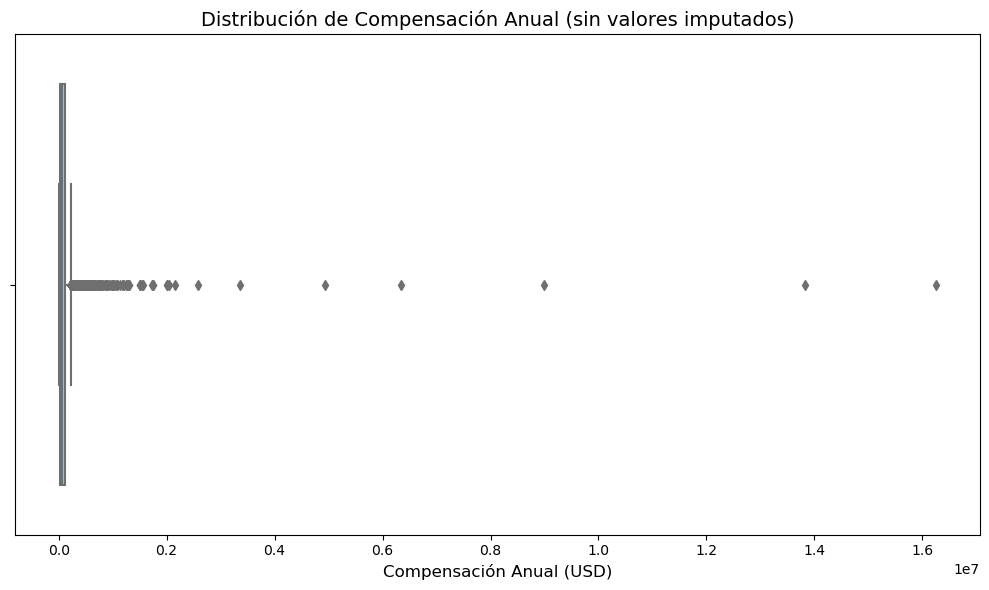

In [138]:
# Paso 1: Filtrar valores que NO son la mediana imputada ya que producia outliers irreales
df_real = df[df['ConvertedCompYearly'] != 64444.0]

# Paso 2: Calcular Q1, Q3 y IQR
Q1 = df_real['ConvertedCompYearly'].quantile(0.25)
Q3 = df_real['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Paso 3: Definir límites
lower_limit = max(0, Q1 - 1.5 * IQR)  # Ajustar límite inferior a 0
upper_limit = Q3 + 1.5 * IQR

# Paso 4: Identificar outliers
outliers = df_real[
    (df_real['ConvertedCompYearly'] < lower_limit) |
    (df_real['ConvertedCompYearly'] > upper_limit)
]

# Paso 5: Mostrar resultados
print(f"Q1: {Q1:,.2f}")
print(f"Q3: {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")
print(f"Límite inferior: {lower_limit:,.2f}")
print(f"Límite superior: {upper_limit:,.2f}")
print(f"Número de valores atípicos detectados: {len(outliers)}")


# Filtrar valores distintos de la mediana (imputados)
df_real = df[df['ConvertedCompYearly'] != 64444.0]

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_real['ConvertedCompYearly'], color='skyblue')

# Título y etiquetas
plt.title('Distribución de Compensación Anual (sin valores imputados)', fontsize=14)
plt.xlabel('Compensación Anual (USD)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [139]:
### Tarea 58 - Eliminar valores atípicos y crear un nuevo DataFrame

In [140]:
# Crear un nuevo DataFrame excluyendo solo los valores atípicos reales
df_sin_outliers = df[
    (df['ConvertedCompYearly'] >= 0) &
    (df['ConvertedCompYearly'] <= 220182.0)
]

# Validar el tamaño del nuevo DataFrame
print(f"Número de registros original: {len(df)}")
print(f"Número de registros sin outliers: {len(df_sin_outliers)}")
print(f"Número de valores eliminados: {len(df) - len(df_sin_outliers)}")


Número de registros original: 52418
Número de registros sin outliers: 51572
Número de valores eliminados: 846


In [141]:
### Tarea 59: Analizar la correlación entre la edad (transformada) y otras columnas numéricas.

In [142]:
unique_age_values = df_sin_outliers['Age'].unique()

print("Valores únicos en la columna 'Age':")
for value in unique_age_values:
    print(f"- '{value}'")
    JobSatPoints_6

Valores únicos en la columna 'Age':
- 'Under 18 years old'


NameError: name 'JobSatPoints_6' is not defined

In [ ]:
df_sin_outliers.isnull().sum()

In [ ]:
# 1: Asignar valores numéricos a la columna Age

# Asegurarse de trabajar con una copia real
df_sin_outliers = df_sin_outliers.copy()

# Mapeo de rangos a valores aproximados
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 23,
    '25-34 years old': 33,
    '35-44 years old': 43,
    '45-54 years old': 53,
    '55-64 years old': 63,
    '65 years or older': 66,
    'Prefer not to say': -1  # Para mantenerlo pero diferenciarlo
}


# Aplicar la transformación sin generar advertencias
df_sin_outliers['AgeNum'] = df_sin_outliers['Age'].map(age_map)

# Crear nueva columna con valores numéricos aproximados
df_sin_outliers['AgeNum'] = df_sin_outliers['Age'].map(age_map)


In [ ]:
# Calcular la media de edad sin contar los -1 (o los 'Prefer not to say')
mean_age = df_sin_outliers[df_sin_outliers['AgeNum'] != -1]['AgeNum'].mean()

# Reemplazar los -1 con la media
df_sin_outliers['AgeNum'] = df_sin_outliers['AgeNum'].replace(-1, mean_age)

df_sin_outliers.isnull().sum()

In [ ]:
# 2: Seleccionar columnas numéricas y calcular correlaciones

# Seleccionar columnas numéricas relevantes
num_cols = df_sin_outliers.select_dtypes(include='number')

# Calcular matriz de correlación
corr_matrix = num_cols.corr()

# Extraer solo la fila que corresponde a AgeNum
age_corr = corr_matrix['AgeNum'].sort_values(ascending=False)
print(age_corr)


In [ ]:
# 3: Visualizar la matriz de correlación

# Visualización completa de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=14)
plt.tight_layout()
plt.show()

# Opcional: Visualizar solo correlaciones con AgeNum
plt.figure(figsize=(8, 5))
age_corr.drop('AgeNum').plot(kind='bar', color='skyblue')
plt.title('Correlación de Edad con Otras Variables Numéricas', fontsize=14)
plt.ylabel('Coeficiente de correlación')
plt.tight_layout()
plt.show()


In [ ]:
### Laboratorios 10 - Determinación de la correlación

In [ ]:
### Tarea 60 - Analizar y visualizar la distribución de la compensación

In [ ]:
# Verifica si hay valores nulos en la columna 'ConvertedCompYearly'
print(df_sin_outliers['ConvertedCompYearly'].isnull().sum())

# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Dibuja el histograma
sns.histplot(df_sin_outliers['ConvertedCompYearly'], kde=True, bins=30, color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución e Histograma de ConvertedCompYearly', fontsize=15)
plt.xlabel('Compensación Anual Convertida (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Muestra el gráfico
plt.show()


In [ ]:
# Tarea 61 - Calcular la compensación mediana para empleados a tiempo completo

# Filtra los datos para obtener solo los empleados a tiempo completo
empleados_full_time = df_sin_outliers[df_sin_outliers['Employment_Label'] == 'Employed, full-time']

# Calcula la compensación mediana para los empleados a tiempo completo
mediana_compensacion = empleados_full_time['ConvertedCompYearly'].median()

# Muestra el resultado
print(f'La compensación mediana para empleados a tiempo completo es: {mediana_compensacion}')


In [ ]:
### Tarea 62 - Análisis del rango y la distribución de la compensación por país

In [ ]:
# Filtrar países con suficientes registros (ajustar el valor mínimo según sea necesario)
pais_min_registros = 100  # Puedes ajustar este valor según lo que consideres relevante
df_paises_filtrados = df_sin_outliers.groupby('Country').filter(lambda x: len(x) >= pais_min_registros)

# Configura el tamaño de la figura
plt.figure(figsize=(16, 8))

# Dibuja el diagrama de caja para la compensación anual por país
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_paises_filtrados, palette='Set2')

# Rota las etiquetas del eje x para que se vean mejor
plt.xticks(rotation=90)

# Añadir título y etiquetas
plt.title('Distribución de la compensación anual por país', fontsize=15)
plt.xlabel('País', fontsize=12)
plt.ylabel('Compensación Anual Convertida (USD)', fontsize=12)

# Mostrar el gráfico
plt.show()


In [ ]:
# Suponiendo que la mediana utilizada para la imputación fue almacenada en una variable llamada 'mediana_imputacion'
mediana_imputacion = df_sin_outliers['ConvertedCompYearly'].median()  # O la mediana que hayas utilizado para la imputación

# Filtra los datos para excluir las filas con la mediana utilizada en la imputación
df_sin_imputaciones = df_sin_outliers[df_sin_outliers['ConvertedCompYearly'] != mediana_imputacion]

# Filtrar países con suficientes registros
df_paises_filtrados = df_sin_imputaciones.groupby('Country').filter(lambda x: len(x) >= pais_min_registros)

# Configura el tamaño de la figura
plt.figure(figsize=(16, 8))

# Dibuja el diagrama de caja para la compensación anual por país
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_paises_filtrados, palette='Set2')

# Rota las etiquetas del eje x para que se vean mejor
plt.xticks(rotation=90)

# Añadir título y etiquetas
plt.title('Distribución de la compensación anual por país (sin valores imputados)', fontsize=15)
plt.xlabel('País', fontsize=12)
plt.ylabel('Compensación Anual Convertida (USD)', fontsize=12)

# Mostrar el gráfico
plt.show()


In [ ]:
### Tarea 63 realizada en tarea 58

In [ ]:
### Tarea 64 - Calcular correlaciones entre ConvertedCompYearly, WorkExp y JobSatPoints_1.

In [ ]:
# Seleccionar las columnas clave
df_correlacion = df_sin_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]

# Calcular las correlaciones
correlaciones = df_correlacion.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el mapa de calor
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Añadir título
plt.title('Mapa de calor de correlaciones entre ConvertedCompYearly, WorkExp y JobSatPoints_1', fontsize=12)

# Mostrar el gráfico
plt.show()


In [ ]:
### Tarea 65 - Diagrama de dispersión para correlaciones

In [ ]:
# Configurar el tamaño de la figura para los gráficos
plt.figure(figsize=(14, 6))

# Subgráfico 1: ConvertedCompYearly vs WorkExp
plt.subplot(1, 2, 1)
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df_sin_outliers, color='blue')
plt.title('Diagrama de dispersión: Compensación vs Experiencia Laboral', fontsize=14)
plt.xlabel('Años de Experiencia Laboral', fontsize=12)
plt.ylabel('Compensación Anual Convertida (USD)', fontsize=12)

# Subgráfico 2: ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df_sin_outliers, color='green')
plt.title('Diagrama de dispersión: Compensación vs Satisfacción Laboral', fontsize=14)
plt.xlabel('Puntuación de Satisfacción Laboral', fontsize=12)
plt.ylabel('Compensación Anual Convertida (USD)', fontsize=12)

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [ ]:
# Exportar el DataFrame limpio a un archivo CSV
df_sin_outliers.to_csv('datos_sin_outliers2.csv', index=False)

print("El conjunto de datos limpio ha sido exportado exitosamente a 'datos_sin_outliers2.csv'.")


In [ ]:
df_sin_outliers.head()

In [ ]:
df_sin_outliers.columns.tolist()


In [ ]:
df_sin_outliers.dtypes

In [ ]:
df_sin_outliers.isnull().sum()

In [ ]:
unique_age_values = df_sin_outliers['JobSatPoints_6'].unique()

print("Valores únicos en la columna 'JobSatPoints_6':")
for value in unique_age_values:
    print(f"- '{value}'")
    